# PokeGAN


In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
from preprocessing import get_dataloader

In [3]:
# DataLoader parameters
batch_size = 64
min_scale, max_scale = 16, 64

In [4]:
poke_loader = get_dataloader(batch_size, max_scale, data_dir='data')

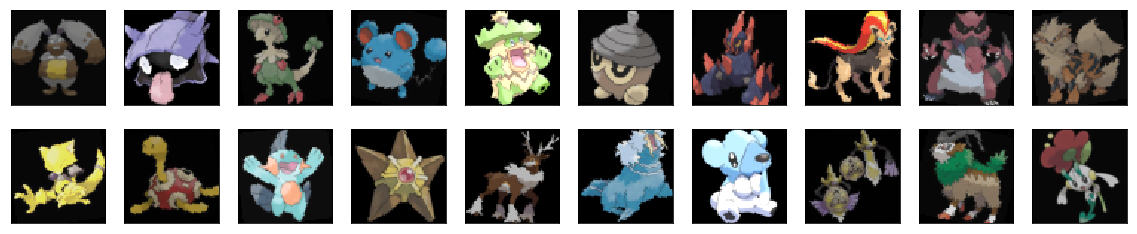

In [5]:
# helper display function
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# obtain one batch of training images
dataiter = iter(poke_loader)
images, _ = dataiter.next() # _ for no labels

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

In [6]:
import torch.nn as nn

In [7]:
# Model hyperparameters
z_size = 100
latent_feature_size = 4

d_conv_dim = 32
d_ksize = 3
d_stride = 2
g_conv_dim = 32
g_ksize = 5
g_stride = 2
use_dropout = True
# norm_block = nn.BatchNorm2d
norm_block = nn.InstanceNorm2d
# norm_block = nn.LocalResponseNorm

In [8]:
import torch

# Check for a GPU
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Training on GPU!')

Training on GPU!


In [9]:
from torch.utils.tensorboard import SummaryWriter
logger = SummaryWriter("logs")
log_name = "in_3stages_3cycles"

In [10]:
import os
from shutil import rmtree
if os.path.exists(os.path.join('logs', log_name)):
    rmtree(os.path.join('logs', log_name))

In [11]:
import torch.optim as optim

# Training hyperparameters
criterion = nn.BCEWithLogitsLoss()
cycles = [[dict(lr=1e-3, nb_epochs=200),
          dict(lr=5e-4, nb_epochs=600)],
          [dict(lr=1e-3, nb_epochs=200),
          dict(lr=5e-4, nb_epochs=900),
          dict(lr=2e-4, nb_epochs=100)],
          [dict(lr=5e-4, nb_epochs=400),
          dict(lr=2e-4, nb_epochs=1600)]]
beta1 = 0.5
beta2 = 0.999
nb_stages = int(np.log2(max_scale / min_scale)) + 1
img_size = min_scale

In [12]:
from models import Discriminator, Generator
from train import train_GAN
from optim import get_noise, normal_initialization

In [13]:
# Create folder for sample images and gradient flows
if not os.path.exists(os.path.join('samples', log_name)):
    os.makedirs(os.path.join('samples', log_name))
    os.makedirs(os.path.join('samples', log_name, 'samples'))
    os.makedirs(os.path.join('samples', log_name, 'gradflow'))
    os.makedirs(os.path.join('samples', log_name, 'state_dicts'))
sample_size = 16
fixed_z = get_noise((sample_size, z_size))

Stage 16x16 (1/3)
Cycle (1/3) - {'lr': 0.001, 'nb_epochs': 200}
Epoch [   10/  200] | d_loss: 1.5731 | g_loss: 4.1448
Epoch [   20/  200] | d_loss: 1.0134 | g_loss: 4.5680
Epoch [   30/  200] | d_loss: 0.2416 | g_loss: 3.6840
Epoch [   40/  200] | d_loss: 1.5519 | g_loss: 2.6312
Epoch [   50/  200] | d_loss: 1.5243 | g_loss: 3.5527
Epoch [   60/  200] | d_loss: 0.5152 | g_loss: 1.5447
Epoch [   70/  200] | d_loss: 1.0454 | g_loss: 2.0777
Epoch [   80/  200] | d_loss: 1.0034 | g_loss: 1.6394
Epoch [   90/  200] | d_loss: 0.8037 | g_loss: 2.0841
Epoch [  100/  200] | d_loss: 0.3744 | g_loss: 1.6303


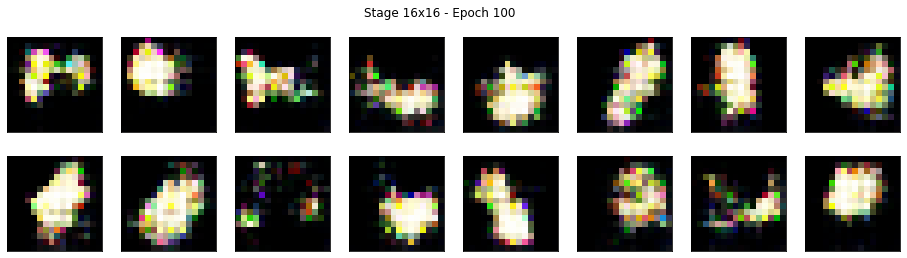

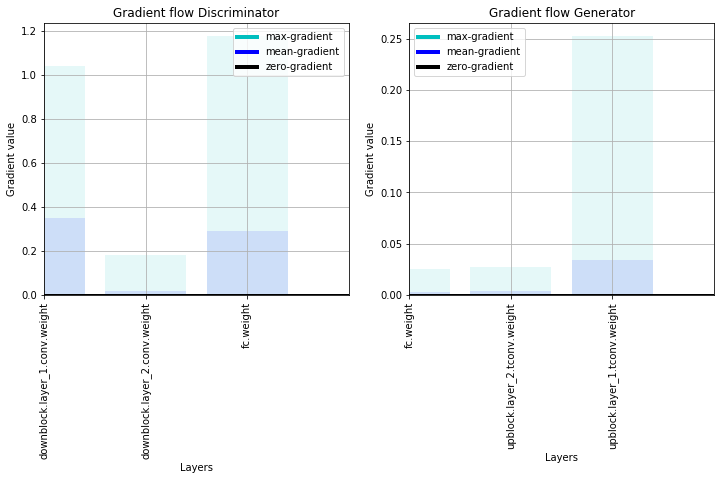

Epoch [  110/  200] | d_loss: 1.1403 | g_loss: 1.3268
Epoch [  120/  200] | d_loss: 1.0715 | g_loss: 1.9293
Epoch [  130/  200] | d_loss: 1.4298 | g_loss: 0.8827
Epoch [  140/  200] | d_loss: 1.4542 | g_loss: 1.0282
Epoch [  150/  200] | d_loss: 1.3398 | g_loss: 0.9308
Epoch [  160/  200] | d_loss: 1.3763 | g_loss: 0.8619
Epoch [  170/  200] | d_loss: 1.3863 | g_loss: 0.8160
Epoch [  180/  200] | d_loss: 1.3551 | g_loss: 0.8617
Epoch [  190/  200] | d_loss: 1.3631 | g_loss: 0.8369
Epoch [  200/  200] | d_loss: 1.4654 | g_loss: 0.7329


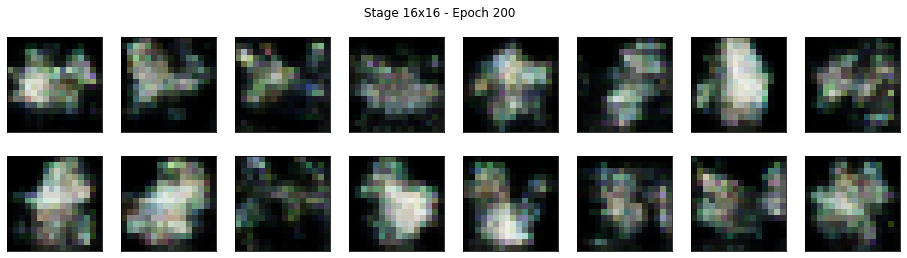

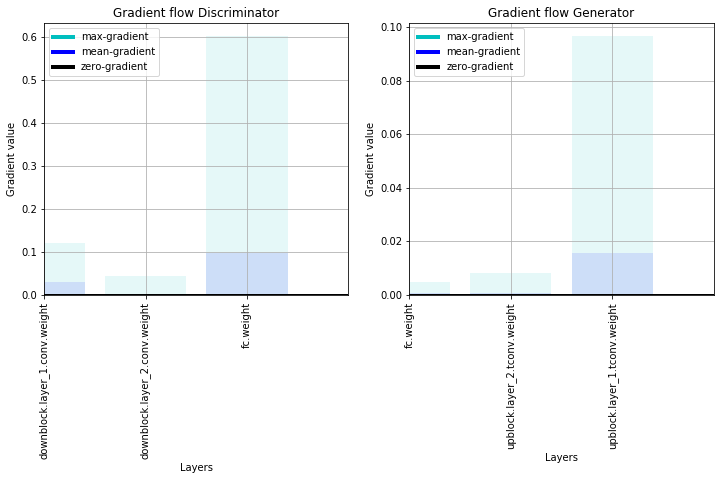

Cycle (2/3) - {'lr': 0.0005, 'nb_epochs': 600}
Epoch [   10/  600] | d_loss: 1.3059 | g_loss: 0.7133
Epoch [   20/  600] | d_loss: 1.4699 | g_loss: 0.7747
Epoch [   30/  600] | d_loss: 1.3319 | g_loss: 0.6371
Epoch [   40/  600] | d_loss: 1.2552 | g_loss: 0.7479
Epoch [   50/  600] | d_loss: 1.1895 | g_loss: 0.8002
Epoch [   60/  600] | d_loss: 1.3949 | g_loss: 0.7395
Epoch [   70/  600] | d_loss: 1.3831 | g_loss: 0.8210
Epoch [   80/  600] | d_loss: 1.3428 | g_loss: 0.5836
Epoch [   90/  600] | d_loss: 1.3406 | g_loss: 0.6353
Epoch [  100/  600] | d_loss: 1.3689 | g_loss: 0.7266


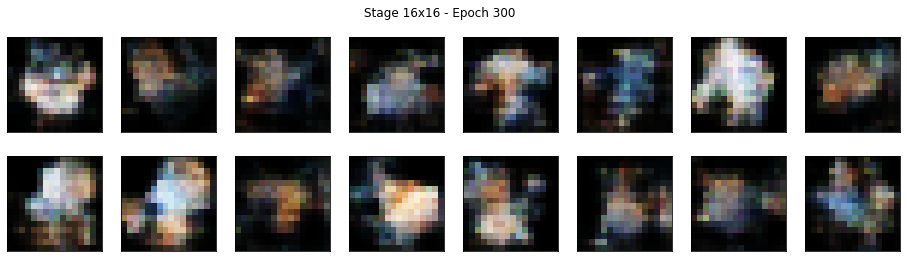

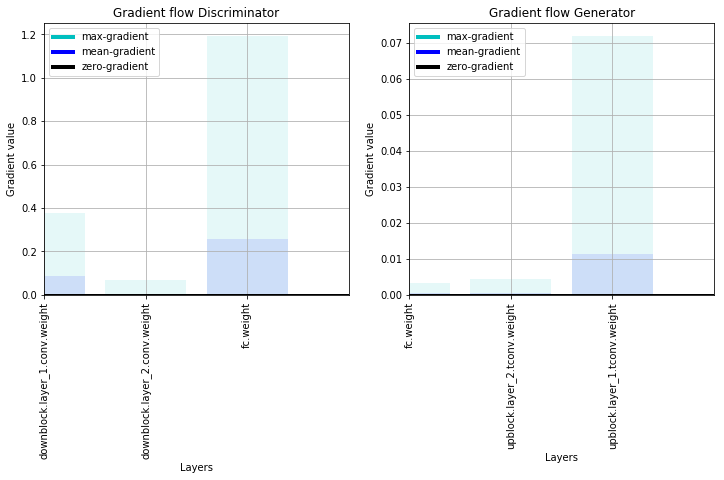

Epoch [  110/  600] | d_loss: 1.3302 | g_loss: 0.7012
Epoch [  120/  600] | d_loss: 1.3308 | g_loss: 0.8705
Epoch [  130/  600] | d_loss: 1.4327 | g_loss: 0.7993
Epoch [  140/  600] | d_loss: 1.3378 | g_loss: 0.7439
Epoch [  150/  600] | d_loss: 1.4413 | g_loss: 0.7668
Epoch [  160/  600] | d_loss: 1.2606 | g_loss: 0.7069
Epoch [  170/  600] | d_loss: 1.3862 | g_loss: 0.6242
Epoch [  180/  600] | d_loss: 1.3814 | g_loss: 0.6008
Epoch [  190/  600] | d_loss: 1.3219 | g_loss: 0.6413
Epoch [  200/  600] | d_loss: 1.3511 | g_loss: 0.6243


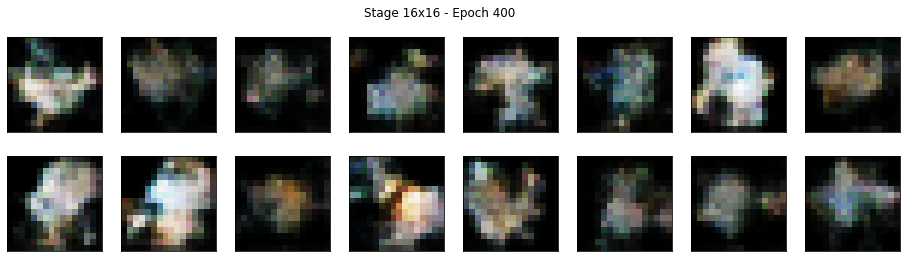

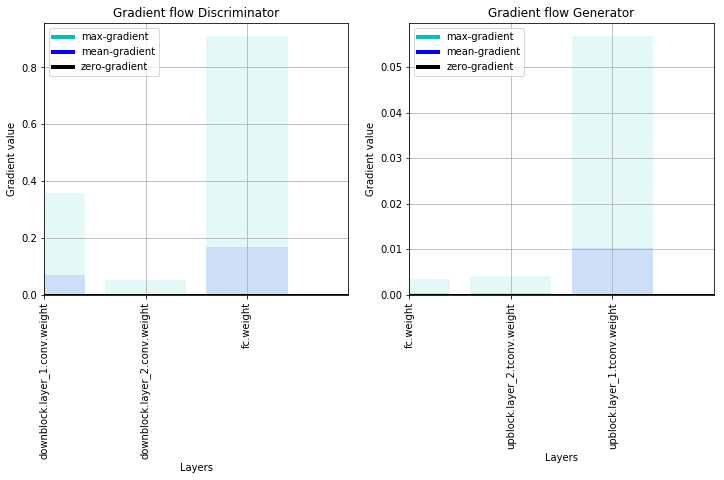

Epoch [  210/  600] | d_loss: 1.2774 | g_loss: 0.6229
Epoch [  220/  600] | d_loss: 1.2586 | g_loss: 0.5608
Epoch [  230/  600] | d_loss: 1.3759 | g_loss: 0.6054
Epoch [  240/  600] | d_loss: 1.3668 | g_loss: 0.6443
Epoch [  250/  600] | d_loss: 1.3568 | g_loss: 0.6311
Epoch [  260/  600] | d_loss: 1.4428 | g_loss: 0.5758
Epoch [  270/  600] | d_loss: 1.3742 | g_loss: 0.7169
Epoch [  280/  600] | d_loss: 1.3730 | g_loss: 0.7109
Epoch [  290/  600] | d_loss: 1.2982 | g_loss: 0.6453
Epoch [  300/  600] | d_loss: 1.3482 | g_loss: 0.6354


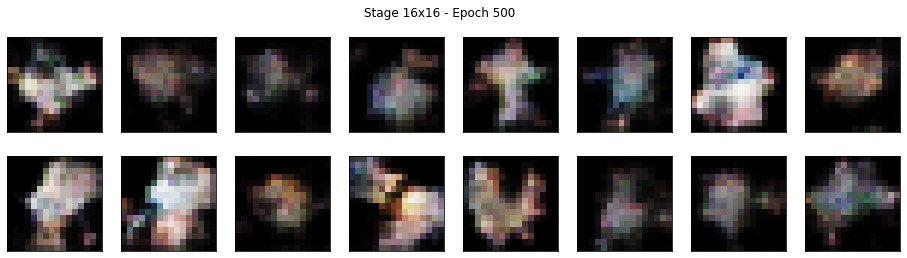

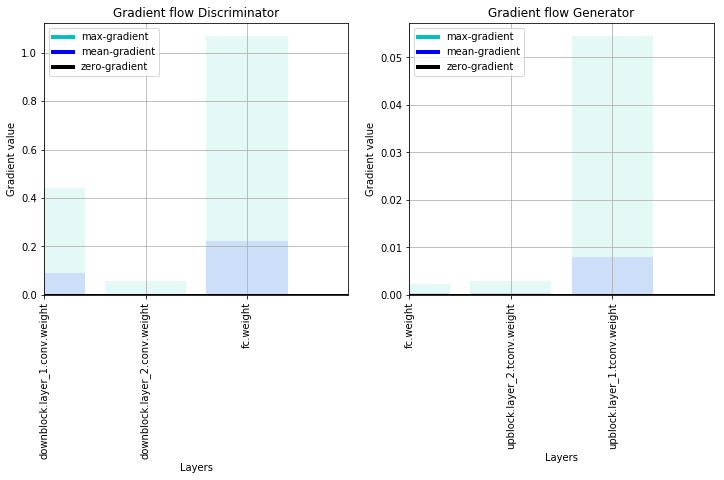

Epoch [  310/  600] | d_loss: 1.3156 | g_loss: 0.5935
Epoch [  320/  600] | d_loss: 1.3692 | g_loss: 0.6218
Epoch [  330/  600] | d_loss: 1.3246 | g_loss: 0.6801
Epoch [  340/  600] | d_loss: 1.3900 | g_loss: 0.7385
Epoch [  350/  600] | d_loss: 1.3917 | g_loss: 0.7800
Epoch [  360/  600] | d_loss: 1.3875 | g_loss: 0.4374
Epoch [  370/  600] | d_loss: 1.3287 | g_loss: 0.6297
Epoch [  380/  600] | d_loss: 1.3844 | g_loss: 0.6915
Epoch [  390/  600] | d_loss: 1.3037 | g_loss: 0.6759
Epoch [  400/  600] | d_loss: 1.3250 | g_loss: 0.5455


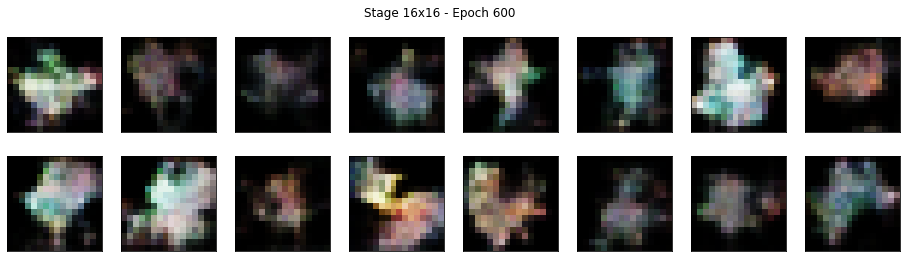

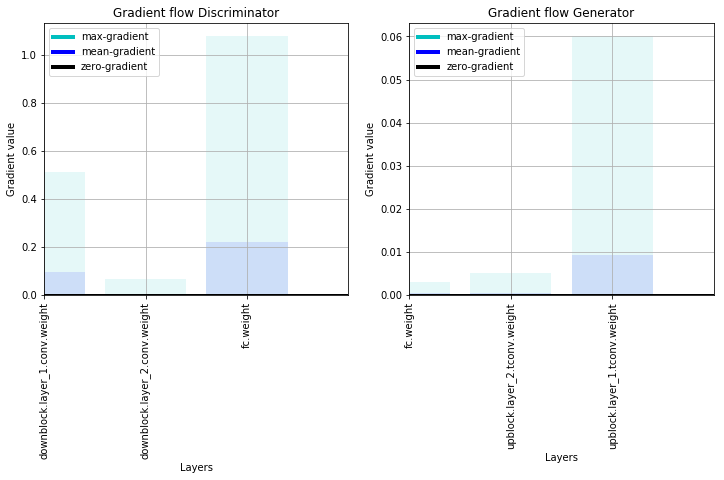

Epoch [  410/  600] | d_loss: 1.3436 | g_loss: 0.6018
Epoch [  420/  600] | d_loss: 1.4050 | g_loss: 0.6949
Epoch [  430/  600] | d_loss: 1.3618 | g_loss: 0.7437
Epoch [  440/  600] | d_loss: 1.3354 | g_loss: 0.5866
Epoch [  450/  600] | d_loss: 1.3292 | g_loss: 0.5690
Epoch [  460/  600] | d_loss: 1.3603 | g_loss: 0.6410
Epoch [  470/  600] | d_loss: 1.3727 | g_loss: 0.6571
Epoch [  480/  600] | d_loss: 1.3518 | g_loss: 0.8033
Epoch [  490/  600] | d_loss: 1.2748 | g_loss: 0.5951
Epoch [  500/  600] | d_loss: 1.3289 | g_loss: 0.5704


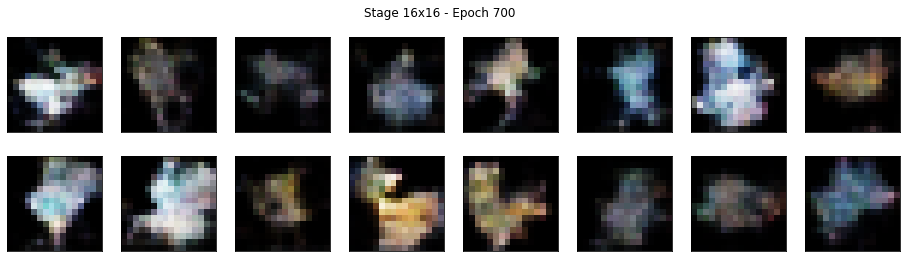

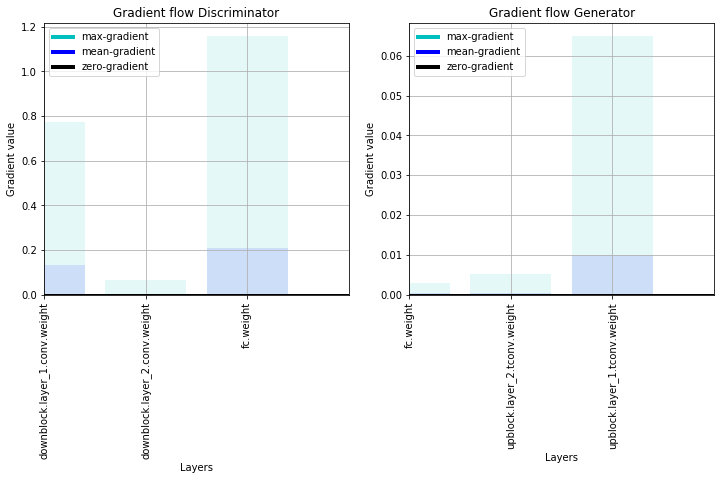

Epoch [  510/  600] | d_loss: 1.2481 | g_loss: 0.6768
Epoch [  520/  600] | d_loss: 1.3689 | g_loss: 0.6595
Epoch [  530/  600] | d_loss: 1.4560 | g_loss: 0.5889
Epoch [  540/  600] | d_loss: 1.3621 | g_loss: 0.7323
Epoch [  550/  600] | d_loss: 1.3703 | g_loss: 0.6402
Epoch [  560/  600] | d_loss: 1.3155 | g_loss: 0.5876
Epoch [  570/  600] | d_loss: 1.3358 | g_loss: 0.7880
Epoch [  580/  600] | d_loss: 1.3683 | g_loss: 0.6369
Epoch [  590/  600] | d_loss: 1.3234 | g_loss: 0.6376
Epoch [  600/  600] | d_loss: 1.3052 | g_loss: 0.6213


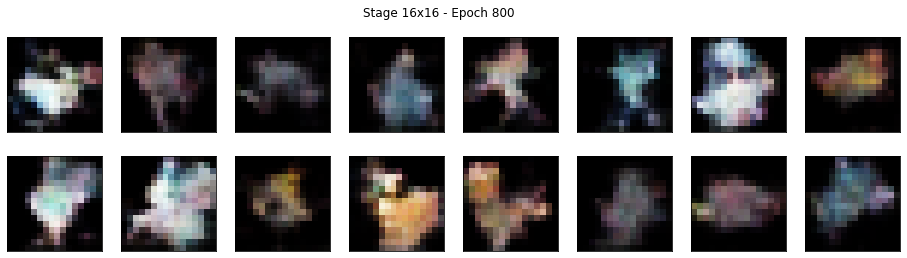

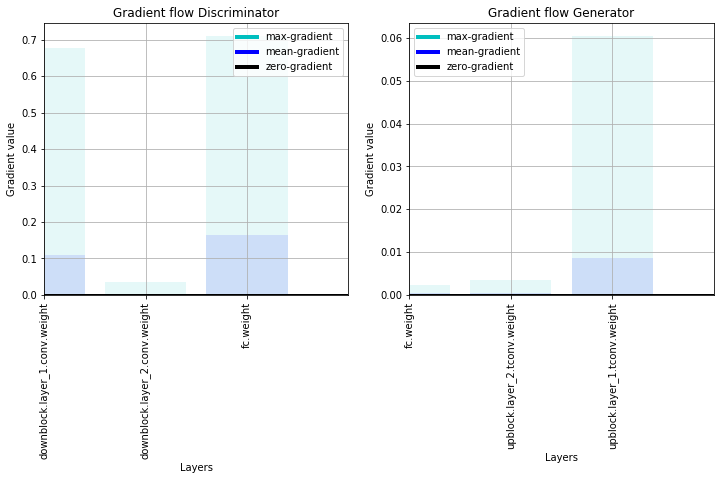

Stage 32x32 (2/3)
Cycle (1/3) - {'lr': 0.001, 'nb_epochs': 300}
Epoch [   10/  300] | d_loss: 1.4924 | g_loss: 3.6450
Epoch [   20/  300] | d_loss: 1.8488 | g_loss: 5.1516
Epoch [   30/  300] | d_loss: 2.9567 | g_loss: 3.1054
Epoch [   40/  300] | d_loss: 1.3272 | g_loss: 3.0358
Epoch [   50/  300] | d_loss: 3.1143 | g_loss: 2.4035
Epoch [   60/  300] | d_loss: 0.9657 | g_loss: 1.8855
Epoch [   70/  300] | d_loss: 1.2000 | g_loss: 2.1584
Epoch [   80/  300] | d_loss: 1.6970 | g_loss: 2.8463
Epoch [   90/  300] | d_loss: 1.7811 | g_loss: 2.7838
Epoch [  100/  300] | d_loss: 1.8547 | g_loss: 2.3925


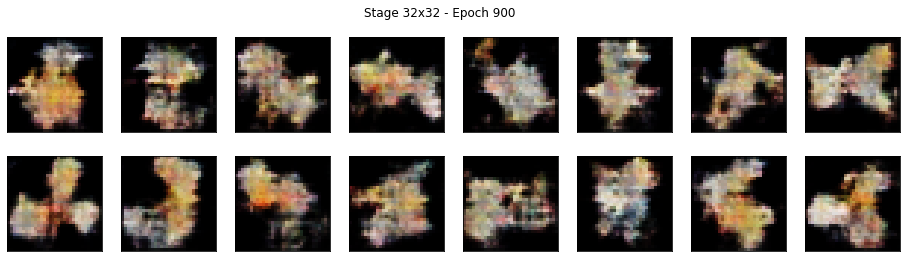

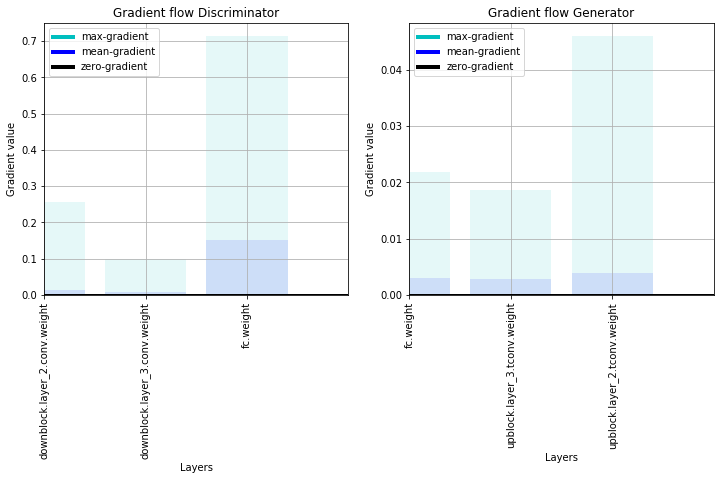

Epoch [  110/  300] | d_loss: 1.5018 | g_loss: 2.3490
Epoch [  120/  300] | d_loss: 0.8089 | g_loss: 2.0139
Epoch [  130/  300] | d_loss: 1.2626 | g_loss: 3.1396
Epoch [  140/  300] | d_loss: 1.0724 | g_loss: 1.7867
Epoch [  150/  300] | d_loss: 1.1131 | g_loss: 1.2113
Epoch [  160/  300] | d_loss: 1.2547 | g_loss: 1.3553
Epoch [  170/  300] | d_loss: 1.0566 | g_loss: 1.6069
Epoch [  180/  300] | d_loss: 1.3143 | g_loss: 2.7010
Epoch [  190/  300] | d_loss: 0.4412 | g_loss: 1.6222
Epoch [  200/  300] | d_loss: 0.7280 | g_loss: 1.0840


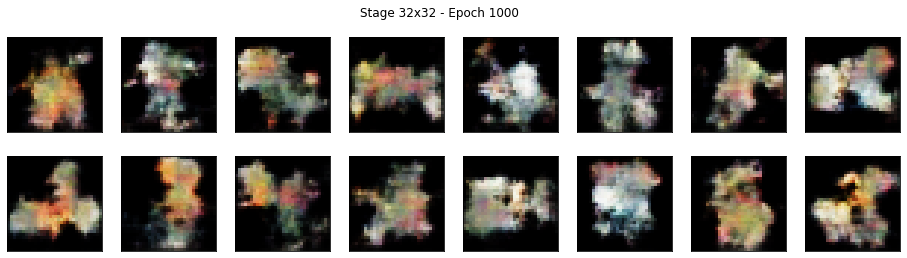

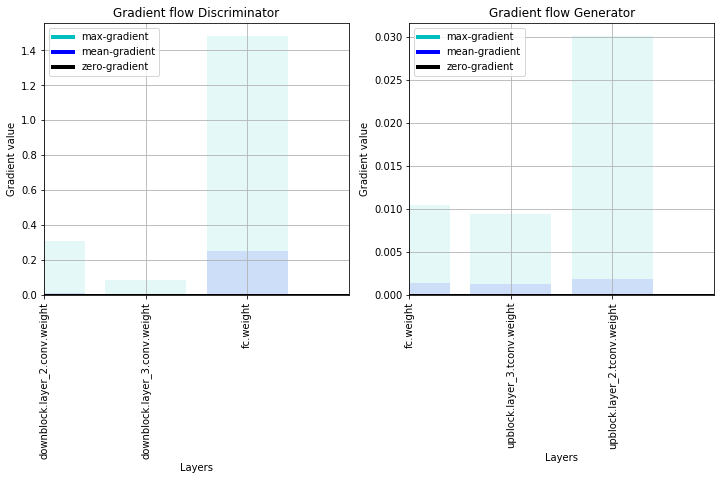

Epoch [  210/  300] | d_loss: 1.1127 | g_loss: 1.5401
Epoch [  220/  300] | d_loss: 1.0969 | g_loss: 1.4948
Epoch [  230/  300] | d_loss: 1.0071 | g_loss: 1.5259
Epoch [  240/  300] | d_loss: 0.6709 | g_loss: 1.6550
Epoch [  250/  300] | d_loss: 1.2562 | g_loss: 1.3109
Epoch [  260/  300] | d_loss: 0.8771 | g_loss: 1.4879
Epoch [  270/  300] | d_loss: 0.8654 | g_loss: 1.6271
Epoch [  280/  300] | d_loss: 0.9485 | g_loss: 1.3030
Epoch [  290/  300] | d_loss: 0.7361 | g_loss: 1.2531
Epoch [  300/  300] | d_loss: 1.3357 | g_loss: 1.1832


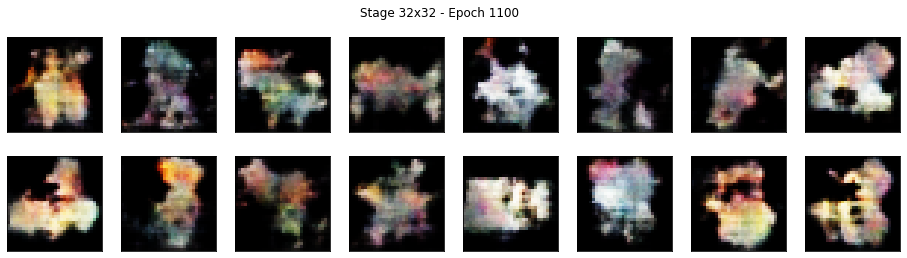

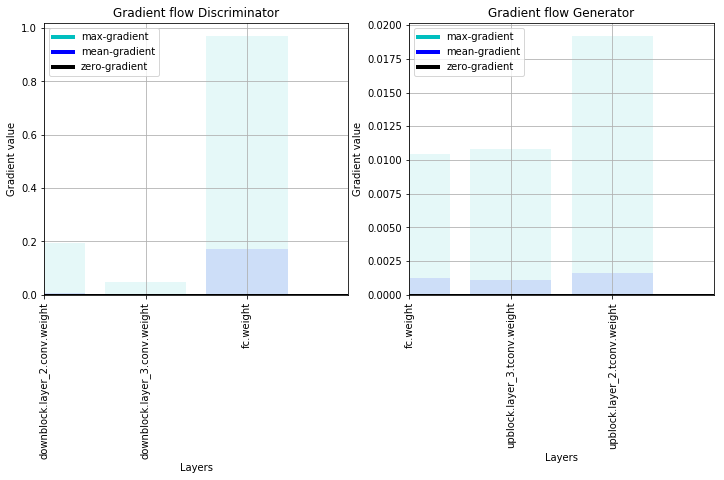

Cycle (2/3) - {'lr': 0.0005, 'nb_epochs': 900}
Epoch [   10/  900] | d_loss: 1.1625 | g_loss: 1.6168
Epoch [   20/  900] | d_loss: 0.8763 | g_loss: 1.1071
Epoch [   30/  900] | d_loss: 1.0113 | g_loss: 1.3899
Epoch [   40/  900] | d_loss: 0.8348 | g_loss: 1.1077
Epoch [   50/  900] | d_loss: 0.9812 | g_loss: 1.1901
Epoch [   60/  900] | d_loss: 0.8719 | g_loss: 1.0501
Epoch [   70/  900] | d_loss: 0.8527 | g_loss: 1.1393
Epoch [   80/  900] | d_loss: 1.1346 | g_loss: 1.5466
Epoch [   90/  900] | d_loss: 1.1374 | g_loss: 1.3104
Epoch [  100/  900] | d_loss: 0.9180 | g_loss: 1.0922


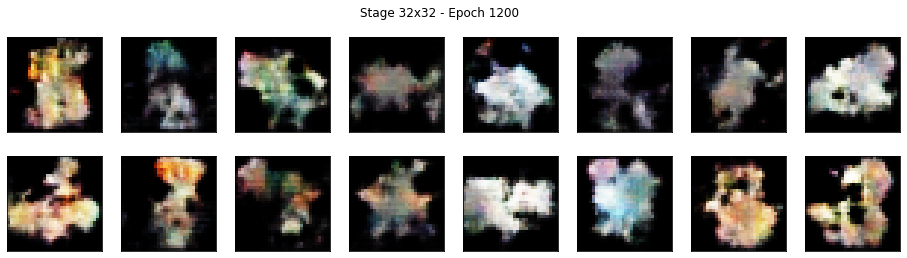

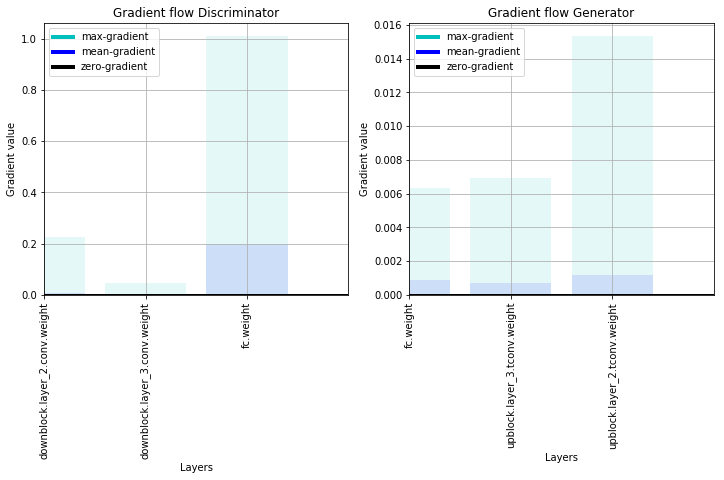

Epoch [  110/  900] | d_loss: 1.0709 | g_loss: 0.9559
Epoch [  120/  900] | d_loss: 0.9144 | g_loss: 1.4447
Epoch [  130/  900] | d_loss: 1.0127 | g_loss: 1.0899
Epoch [  140/  900] | d_loss: 1.0254 | g_loss: 1.2712
Epoch [  150/  900] | d_loss: 0.9957 | g_loss: 0.9788
Epoch [  160/  900] | d_loss: 1.2507 | g_loss: 1.0290
Epoch [  170/  900] | d_loss: 1.0106 | g_loss: 1.2517
Epoch [  180/  900] | d_loss: 0.9921 | g_loss: 1.0097
Epoch [  190/  900] | d_loss: 1.1618 | g_loss: 1.3650
Epoch [  200/  900] | d_loss: 0.7907 | g_loss: 0.6991


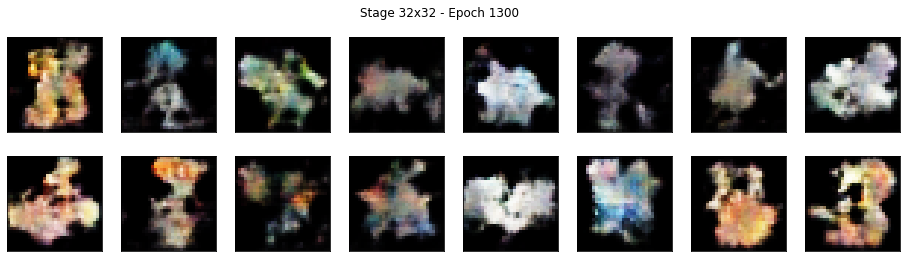

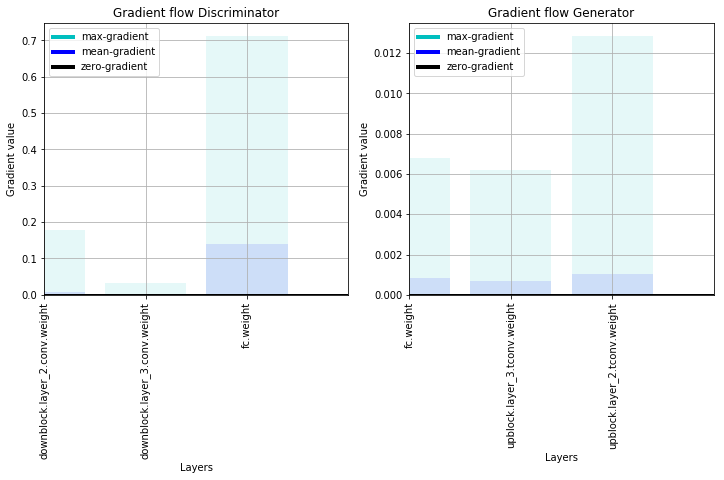

Epoch [  210/  900] | d_loss: 1.0501 | g_loss: 1.0570
Epoch [  220/  900] | d_loss: 1.3395 | g_loss: 1.2210
Epoch [  230/  900] | d_loss: 0.9564 | g_loss: 0.9607
Epoch [  240/  900] | d_loss: 1.1335 | g_loss: 1.0386
Epoch [  250/  900] | d_loss: 1.1231 | g_loss: 0.9505
Epoch [  260/  900] | d_loss: 1.1068 | g_loss: 1.2928
Epoch [  270/  900] | d_loss: 1.1120 | g_loss: 1.1460
Epoch [  280/  900] | d_loss: 1.1827 | g_loss: 1.4916
Epoch [  290/  900] | d_loss: 1.0125 | g_loss: 1.2314
Epoch [  300/  900] | d_loss: 1.1719 | g_loss: 0.9122


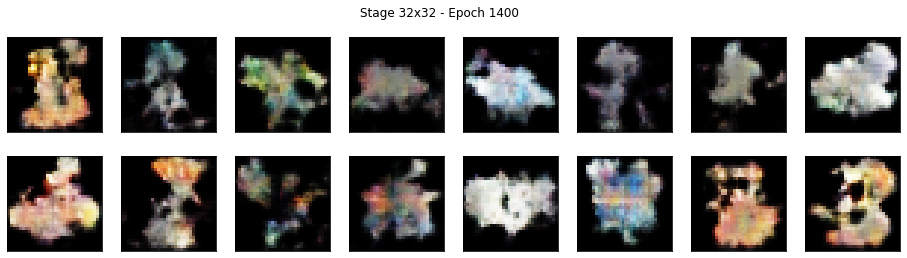

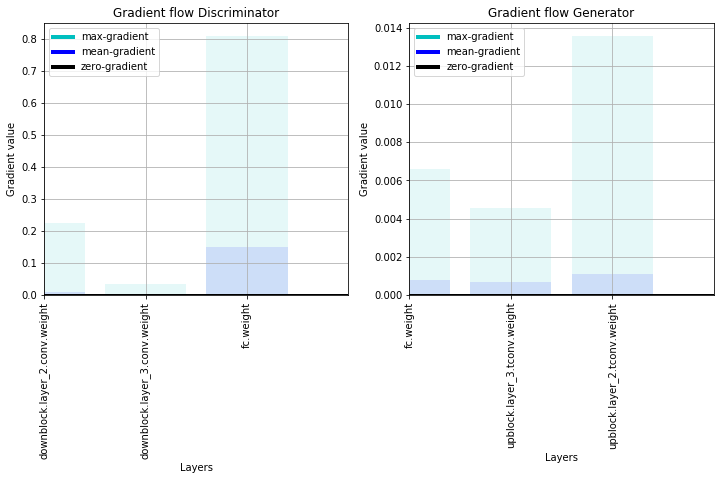

Epoch [  310/  900] | d_loss: 1.1412 | g_loss: 1.0361
Epoch [  320/  900] | d_loss: 1.2530 | g_loss: 1.2637
Epoch [  330/  900] | d_loss: 0.9812 | g_loss: 1.5425
Epoch [  340/  900] | d_loss: 1.1165 | g_loss: 1.1406
Epoch [  350/  900] | d_loss: 1.0311 | g_loss: 1.4433
Epoch [  360/  900] | d_loss: 1.0902 | g_loss: 1.3912
Epoch [  370/  900] | d_loss: 1.1036 | g_loss: 1.1336
Epoch [  380/  900] | d_loss: 1.0536 | g_loss: 1.2426
Epoch [  390/  900] | d_loss: 1.0093 | g_loss: 1.0810
Epoch [  400/  900] | d_loss: 0.9481 | g_loss: 0.9720


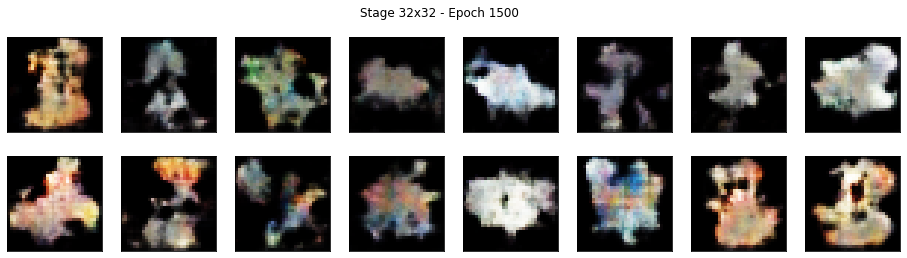

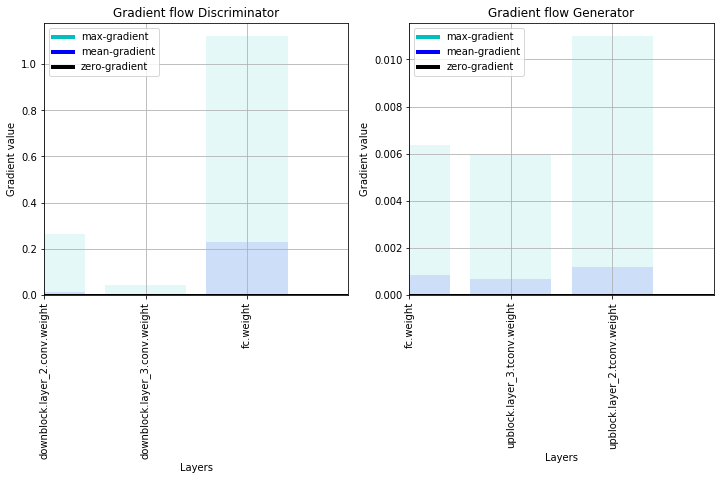

Epoch [  410/  900] | d_loss: 0.9151 | g_loss: 0.9156
Epoch [  420/  900] | d_loss: 1.1939 | g_loss: 1.1669
Epoch [  430/  900] | d_loss: 1.0923 | g_loss: 0.7243
Epoch [  440/  900] | d_loss: 1.0462 | g_loss: 1.1537
Epoch [  450/  900] | d_loss: 0.9859 | g_loss: 0.8444
Epoch [  460/  900] | d_loss: 1.1584 | g_loss: 1.0035
Epoch [  470/  900] | d_loss: 0.8529 | g_loss: 1.7314
Epoch [  480/  900] | d_loss: 1.0125 | g_loss: 0.9264
Epoch [  490/  900] | d_loss: 1.0240 | g_loss: 1.0417
Epoch [  500/  900] | d_loss: 0.9721 | g_loss: 1.3945


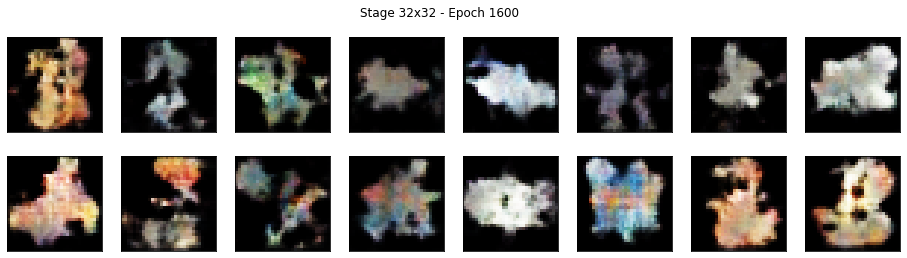

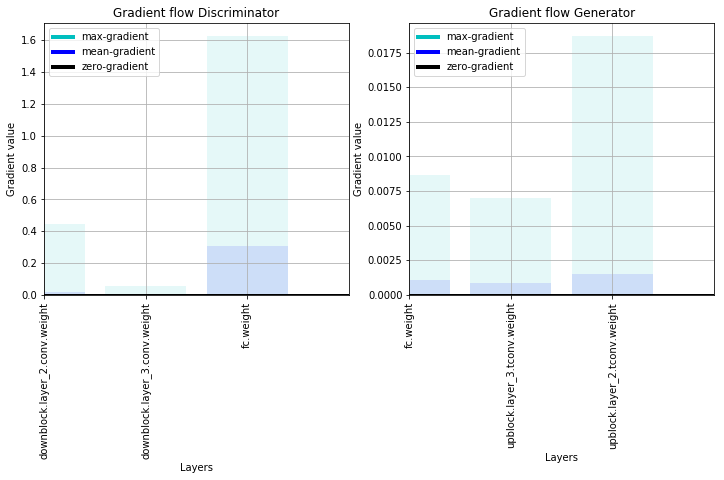

Epoch [  510/  900] | d_loss: 1.0296 | g_loss: 0.9711
Epoch [  520/  900] | d_loss: 1.2310 | g_loss: 1.0397
Epoch [  530/  900] | d_loss: 1.1376 | g_loss: 1.1369
Epoch [  540/  900] | d_loss: 1.2435 | g_loss: 1.1382
Epoch [  550/  900] | d_loss: 0.9665 | g_loss: 1.0087
Epoch [  560/  900] | d_loss: 1.1499 | g_loss: 1.0632
Epoch [  570/  900] | d_loss: 1.3214 | g_loss: 0.9169
Epoch [  580/  900] | d_loss: 1.2411 | g_loss: 0.9296
Epoch [  590/  900] | d_loss: 1.0614 | g_loss: 0.9715
Epoch [  600/  900] | d_loss: 0.8963 | g_loss: 1.0149


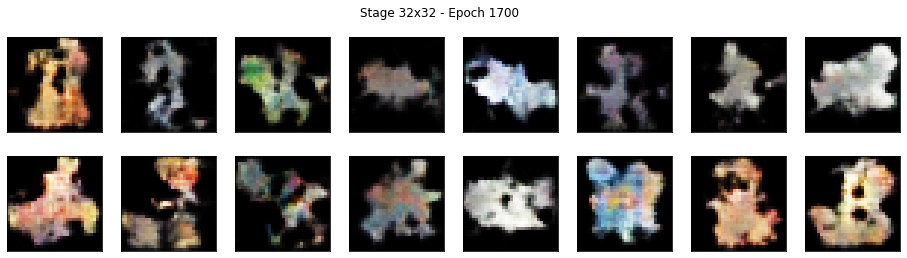

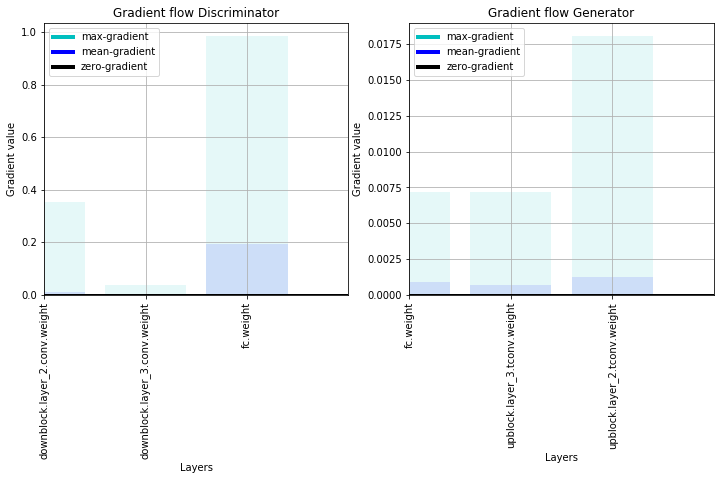

Epoch [  610/  900] | d_loss: 1.0058 | g_loss: 0.7993
Epoch [  620/  900] | d_loss: 0.9317 | g_loss: 0.9202
Epoch [  630/  900] | d_loss: 1.1069 | g_loss: 1.1000
Epoch [  640/  900] | d_loss: 1.0158 | g_loss: 1.2002
Epoch [  650/  900] | d_loss: 1.1215 | g_loss: 1.2309
Epoch [  660/  900] | d_loss: 1.1012 | g_loss: 0.8922
Epoch [  670/  900] | d_loss: 1.0896 | g_loss: 1.1678
Epoch [  680/  900] | d_loss: 1.0505 | g_loss: 1.0772
Epoch [  690/  900] | d_loss: 1.1287 | g_loss: 1.0571
Epoch [  700/  900] | d_loss: 1.1215 | g_loss: 0.9414


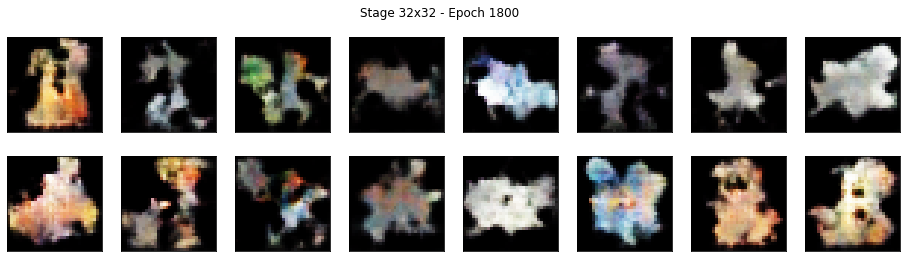

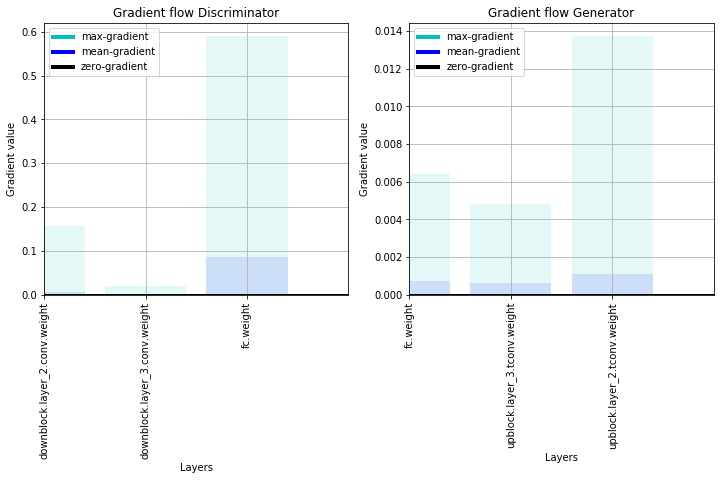

Epoch [  710/  900] | d_loss: 1.1893 | g_loss: 1.0533
Epoch [  720/  900] | d_loss: 1.0749 | g_loss: 1.4746
Epoch [  730/  900] | d_loss: 1.0349 | g_loss: 1.0388
Epoch [  740/  900] | d_loss: 1.0881 | g_loss: 1.2335
Epoch [  750/  900] | d_loss: 1.0273 | g_loss: 1.4542
Epoch [  760/  900] | d_loss: 1.0920 | g_loss: 0.7684
Epoch [  770/  900] | d_loss: 1.1479 | g_loss: 1.1140
Epoch [  780/  900] | d_loss: 1.1389 | g_loss: 1.3331
Epoch [  790/  900] | d_loss: 1.1115 | g_loss: 1.2777
Epoch [  800/  900] | d_loss: 0.9221 | g_loss: 1.3306


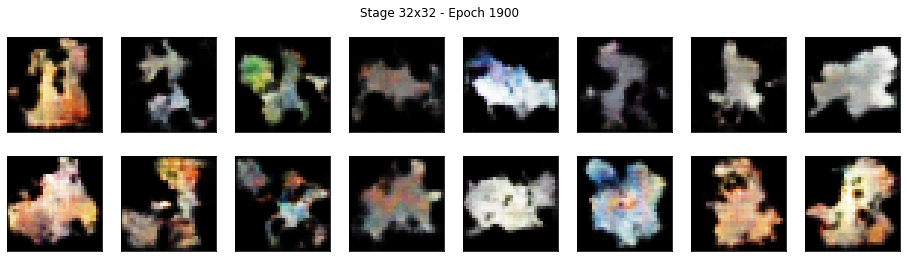

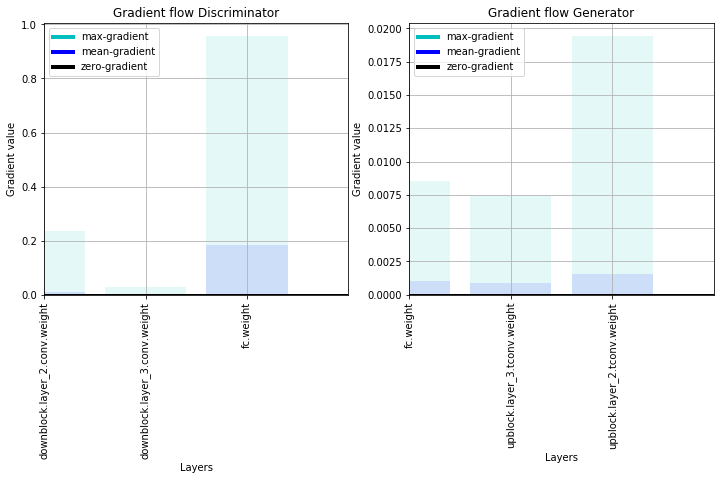

Epoch [  810/  900] | d_loss: 0.9890 | g_loss: 0.9450
Epoch [  820/  900] | d_loss: 1.1494 | g_loss: 1.0113
Epoch [  830/  900] | d_loss: 1.2656 | g_loss: 1.1247
Epoch [  840/  900] | d_loss: 0.7684 | g_loss: 1.0061
Epoch [  850/  900] | d_loss: 1.0101 | g_loss: 1.1626
Epoch [  860/  900] | d_loss: 1.1745 | g_loss: 1.2750
Epoch [  870/  900] | d_loss: 1.1300 | g_loss: 1.3097
Epoch [  880/  900] | d_loss: 1.0185 | g_loss: 1.0928
Epoch [  890/  900] | d_loss: 1.0607 | g_loss: 0.9442
Epoch [  900/  900] | d_loss: 1.0031 | g_loss: 1.0792


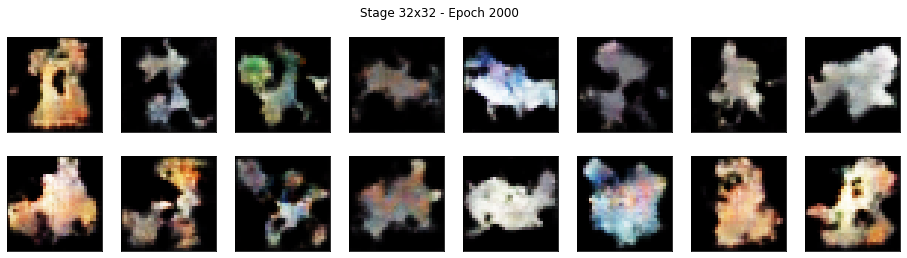

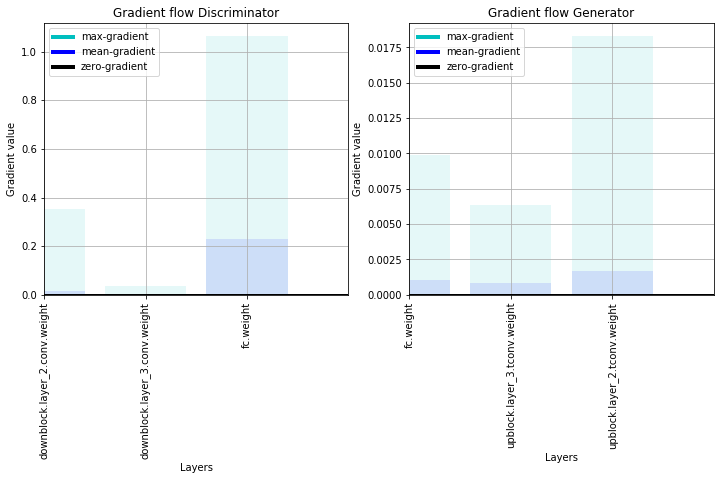

Stage 64x64 (3/3)
Cycle (1/3) - {'lr': 0.0005, 'nb_epochs': 400}
Epoch [   10/  400] | d_loss: 3.9413 | g_loss: 5.6491
Epoch [   20/  400] | d_loss: 3.4773 | g_loss: 10.5866
Epoch [   30/  400] | d_loss: 2.7113 | g_loss: 9.6005
Epoch [   40/  400] | d_loss: 1.3720 | g_loss: 10.0170
Epoch [   50/  400] | d_loss: 3.1514 | g_loss: 7.5354
Epoch [   60/  400] | d_loss: 0.1082 | g_loss: 5.2544
Epoch [   70/  400] | d_loss: 2.1369 | g_loss: 7.4567
Epoch [   80/  400] | d_loss: 1.5314 | g_loss: 6.3816
Epoch [   90/  400] | d_loss: 1.6991 | g_loss: 5.2593
Epoch [  100/  400] | d_loss: 2.9732 | g_loss: 6.9870


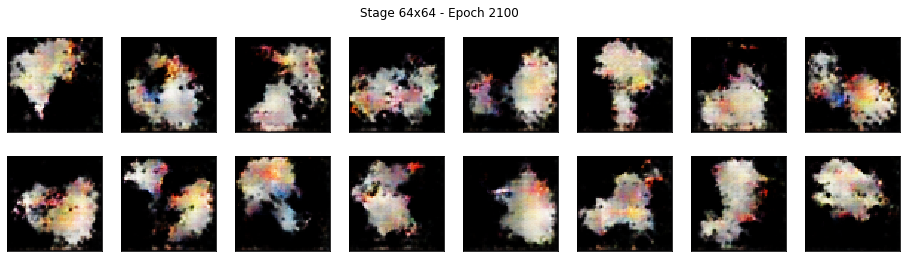

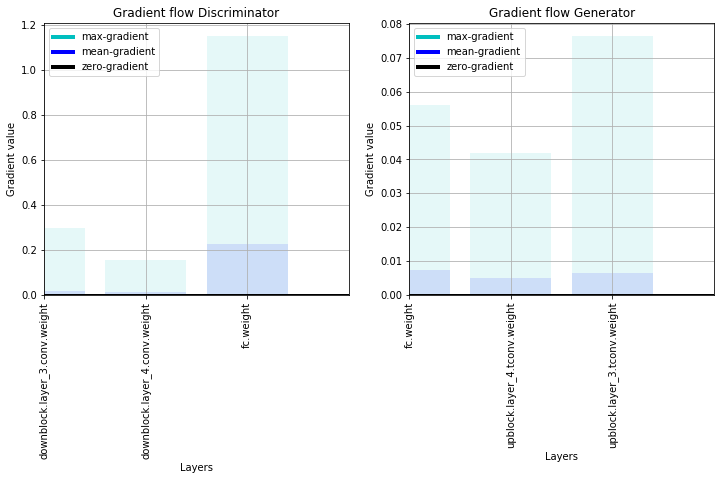

Epoch [  110/  400] | d_loss: 2.1496 | g_loss: 7.6698
Epoch [  120/  400] | d_loss: 0.7020 | g_loss: 8.0564
Epoch [  130/  400] | d_loss: 2.1858 | g_loss: 6.5186
Epoch [  140/  400] | d_loss: 2.7200 | g_loss: 7.0135
Epoch [  150/  400] | d_loss: 1.0284 | g_loss: 5.2164
Epoch [  160/  400] | d_loss: 0.2106 | g_loss: 5.1989
Epoch [  170/  400] | d_loss: 1.4678 | g_loss: 4.7553
Epoch [  180/  400] | d_loss: 1.5746 | g_loss: 4.0347
Epoch [  190/  400] | d_loss: 0.6457 | g_loss: 6.5952
Epoch [  200/  400] | d_loss: 1.0092 | g_loss: 5.9055


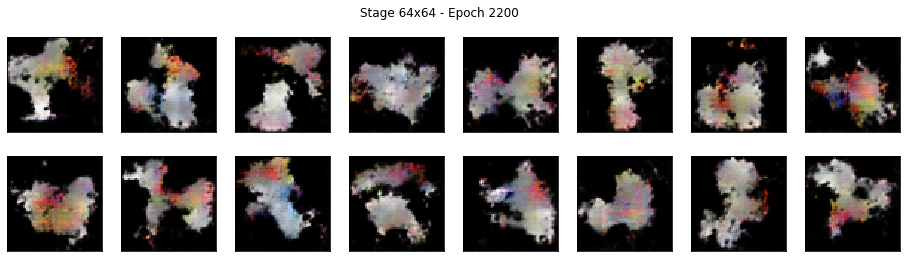

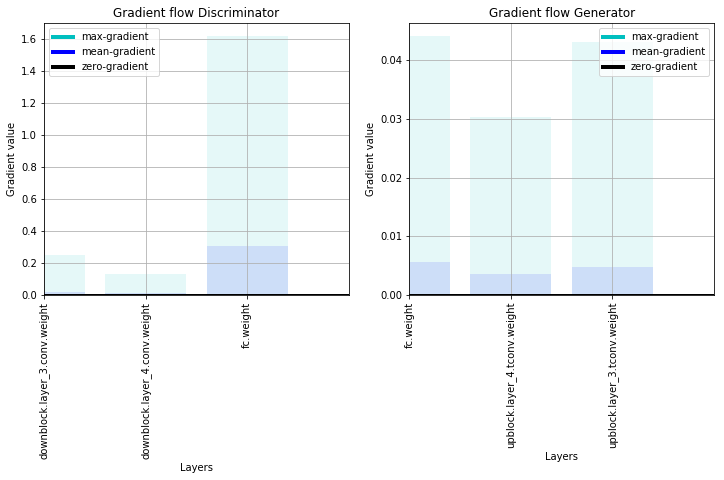

Epoch [  210/  400] | d_loss: 1.9043 | g_loss: 5.6499
Epoch [  220/  400] | d_loss: 1.6968 | g_loss: 6.0397
Epoch [  230/  400] | d_loss: 1.3543 | g_loss: 3.4538
Epoch [  240/  400] | d_loss: 0.7224 | g_loss: 3.4754
Epoch [  250/  400] | d_loss: 1.3805 | g_loss: 4.6006
Epoch [  260/  400] | d_loss: 1.2624 | g_loss: 4.2535
Epoch [  270/  400] | d_loss: 0.8956 | g_loss: 2.9068
Epoch [  280/  400] | d_loss: 1.6629 | g_loss: 3.7283
Epoch [  290/  400] | d_loss: 1.5885 | g_loss: 3.4695
Epoch [  300/  400] | d_loss: 1.3070 | g_loss: 2.3322


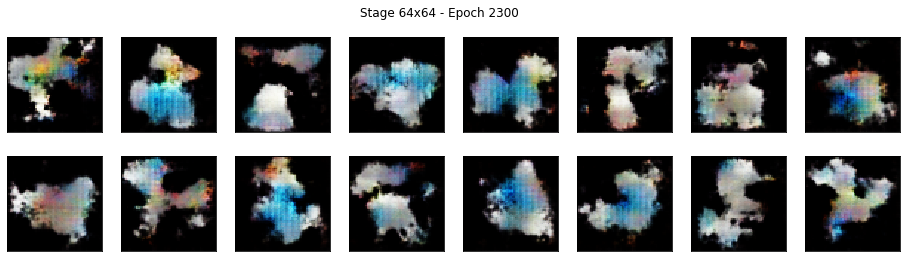

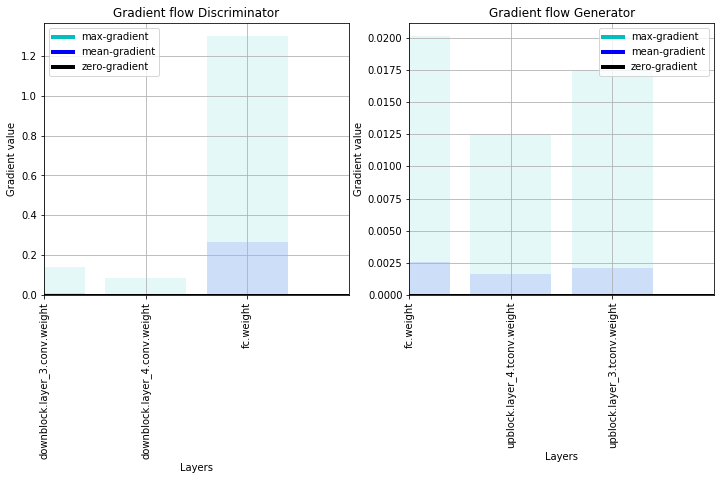

Epoch [  310/  400] | d_loss: 1.0765 | g_loss: 2.9903
Epoch [  320/  400] | d_loss: 1.1783 | g_loss: 3.7097
Epoch [  330/  400] | d_loss: 0.8673 | g_loss: 4.5557
Epoch [  340/  400] | d_loss: 1.0182 | g_loss: 6.0945
Epoch [  350/  400] | d_loss: 0.7257 | g_loss: 3.5934
Epoch [  360/  400] | d_loss: 0.2844 | g_loss: 2.8692
Epoch [  370/  400] | d_loss: 0.8485 | g_loss: 3.9799
Epoch [  380/  400] | d_loss: 0.7705 | g_loss: 2.9259
Epoch [  390/  400] | d_loss: 0.5077 | g_loss: 2.8806
Epoch [  400/  400] | d_loss: 0.5005 | g_loss: 2.6067


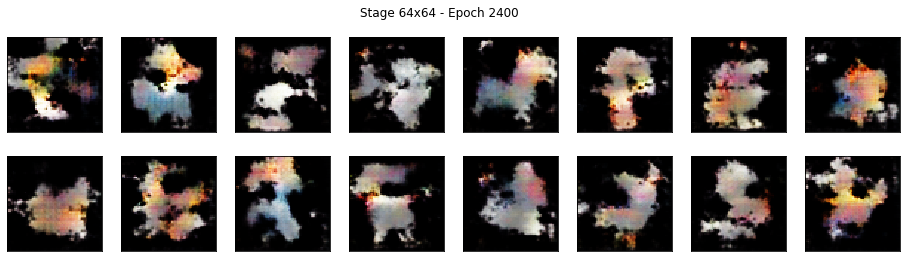

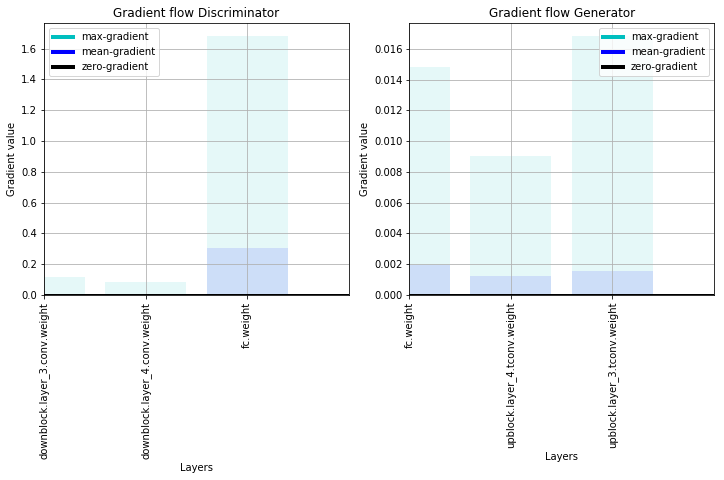

Cycle (2/3) - {'lr': 0.0002, 'nb_epochs': 1600}
Epoch [   10/ 1600] | d_loss: 0.8634 | g_loss: 2.8822
Epoch [   20/ 1600] | d_loss: 1.0739 | g_loss: 2.9420
Epoch [   30/ 1600] | d_loss: 1.1946 | g_loss: 2.8612
Epoch [   40/ 1600] | d_loss: 1.2222 | g_loss: 2.3249
Epoch [   50/ 1600] | d_loss: 1.2571 | g_loss: 2.7042
Epoch [   60/ 1600] | d_loss: 1.2285 | g_loss: 3.0533
Epoch [   70/ 1600] | d_loss: 0.4768 | g_loss: 2.4331
Epoch [   80/ 1600] | d_loss: 1.4506 | g_loss: 2.8547
Epoch [   90/ 1600] | d_loss: 0.8541 | g_loss: 2.4422
Epoch [  100/ 1600] | d_loss: 0.4144 | g_loss: 2.2172


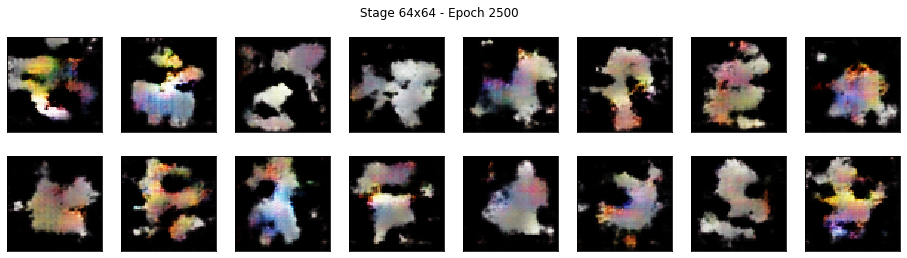

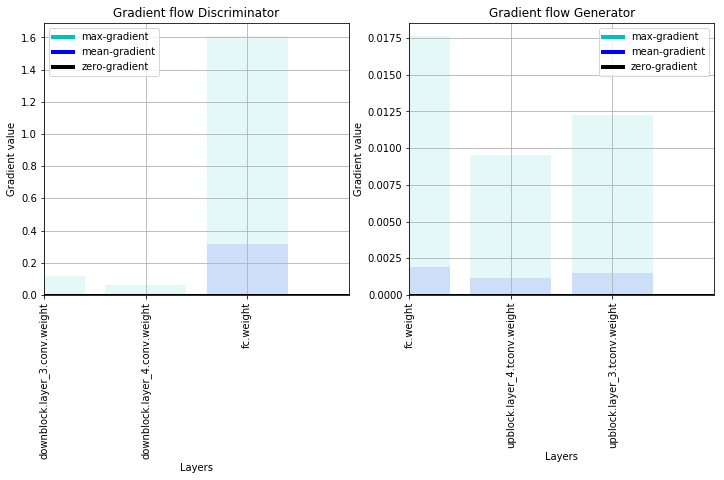

Epoch [  110/ 1600] | d_loss: 0.9000 | g_loss: 1.8943
Epoch [  120/ 1600] | d_loss: 1.4455 | g_loss: 2.2687
Epoch [  130/ 1600] | d_loss: 0.6387 | g_loss: 2.0864
Epoch [  140/ 1600] | d_loss: 0.7302 | g_loss: 2.4667
Epoch [  150/ 1600] | d_loss: 1.4753 | g_loss: 2.4779
Epoch [  160/ 1600] | d_loss: 0.8467 | g_loss: 2.7404
Epoch [  170/ 1600] | d_loss: 0.4207 | g_loss: 2.0141
Epoch [  180/ 1600] | d_loss: 0.6719 | g_loss: 2.4559
Epoch [  190/ 1600] | d_loss: 0.8397 | g_loss: 2.1076
Epoch [  200/ 1600] | d_loss: 0.9236 | g_loss: 2.4274


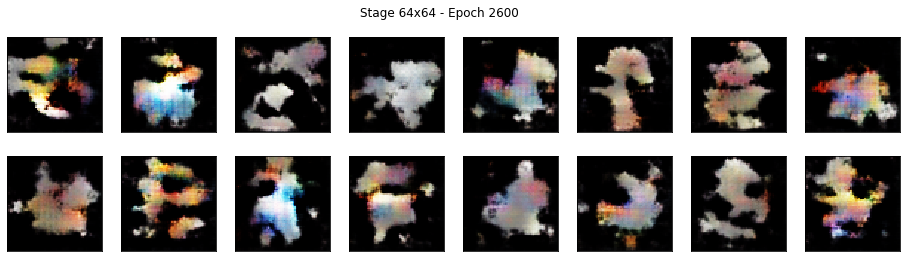

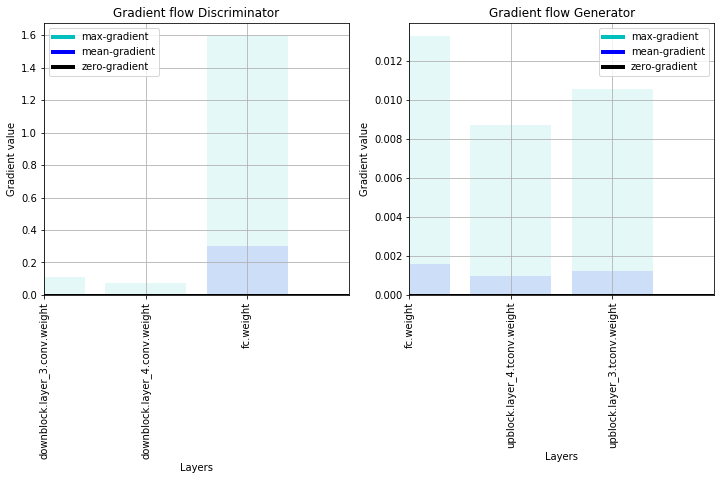

Epoch [  210/ 1600] | d_loss: 0.8216 | g_loss: 2.0871
Epoch [  220/ 1600] | d_loss: 0.9712 | g_loss: 2.2563
Epoch [  230/ 1600] | d_loss: 0.4736 | g_loss: 2.2928
Epoch [  240/ 1600] | d_loss: 0.9414 | g_loss: 2.2078
Epoch [  250/ 1600] | d_loss: 1.4370 | g_loss: 2.6081
Epoch [  260/ 1600] | d_loss: 0.9956 | g_loss: 1.5613
Epoch [  270/ 1600] | d_loss: 0.6350 | g_loss: 1.5791
Epoch [  280/ 1600] | d_loss: 0.5830 | g_loss: 2.3276
Epoch [  290/ 1600] | d_loss: 0.6184 | g_loss: 1.9948
Epoch [  300/ 1600] | d_loss: 0.6481 | g_loss: 2.1658


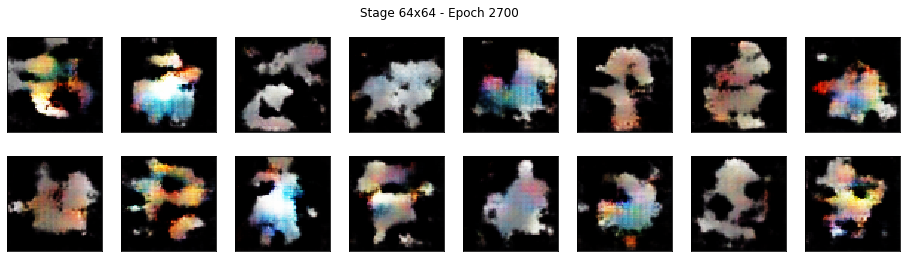

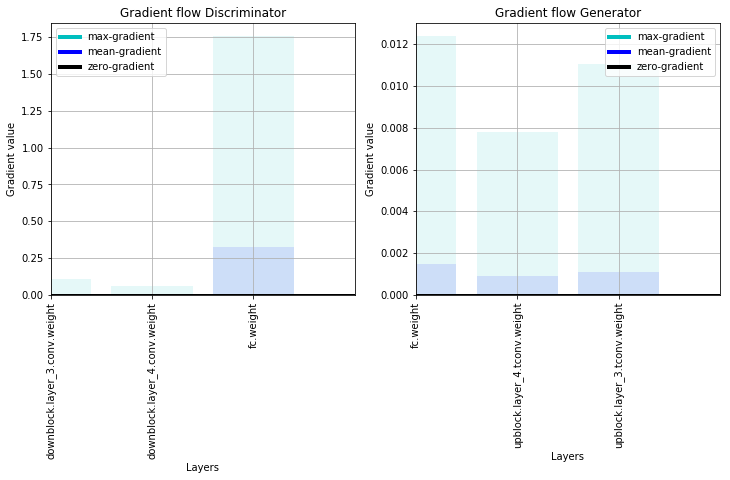

Epoch [  310/ 1600] | d_loss: 0.9266 | g_loss: 2.3165
Epoch [  320/ 1600] | d_loss: 1.2403 | g_loss: 1.9009
Epoch [  330/ 1600] | d_loss: 0.3410 | g_loss: 2.1982
Epoch [  340/ 1600] | d_loss: 0.4268 | g_loss: 1.8476
Epoch [  350/ 1600] | d_loss: 0.7685 | g_loss: 1.9084
Epoch [  360/ 1600] | d_loss: 0.6391 | g_loss: 1.7570
Epoch [  370/ 1600] | d_loss: 0.2070 | g_loss: 2.0768
Epoch [  380/ 1600] | d_loss: 0.3580 | g_loss: 2.4322
Epoch [  390/ 1600] | d_loss: 0.7965 | g_loss: 2.3116
Epoch [  400/ 1600] | d_loss: 0.9971 | g_loss: 2.5715


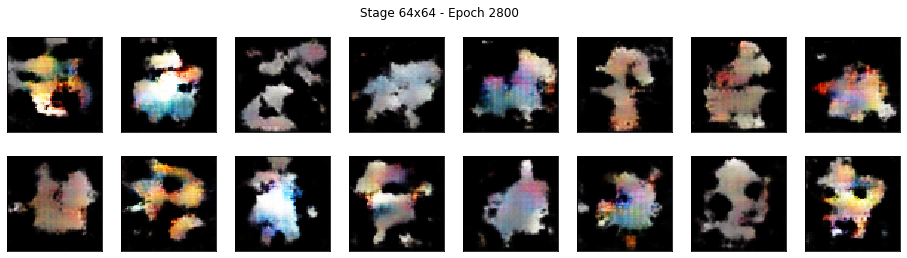

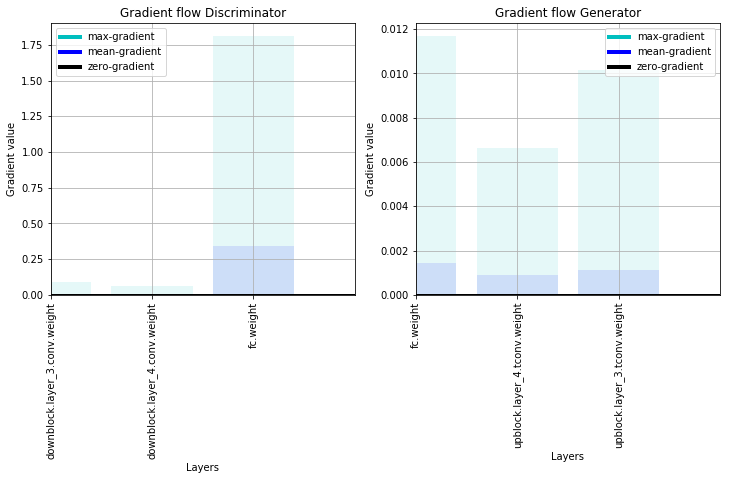

Epoch [  410/ 1600] | d_loss: 0.9665 | g_loss: 2.5315
Epoch [  420/ 1600] | d_loss: 0.9604 | g_loss: 2.1404
Epoch [  430/ 1600] | d_loss: 0.7710 | g_loss: 2.6075
Epoch [  440/ 1600] | d_loss: 0.8353 | g_loss: 2.5943
Epoch [  450/ 1600] | d_loss: 1.2291 | g_loss: 2.2258
Epoch [  460/ 1600] | d_loss: 0.9479 | g_loss: 1.6938
Epoch [  470/ 1600] | d_loss: 0.6064 | g_loss: 2.1292
Epoch [  480/ 1600] | d_loss: 0.9800 | g_loss: 1.9606
Epoch [  490/ 1600] | d_loss: 0.5414 | g_loss: 1.7353
Epoch [  500/ 1600] | d_loss: 1.1625 | g_loss: 2.4726


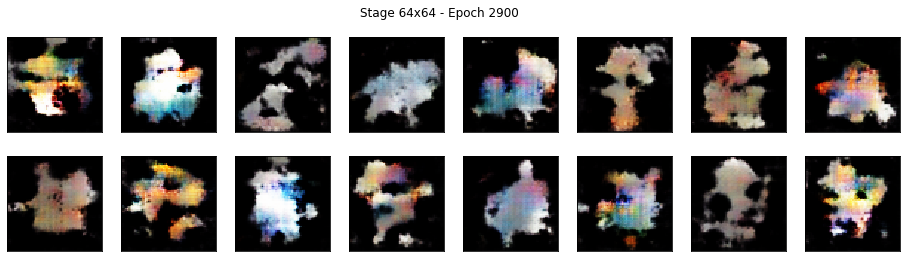

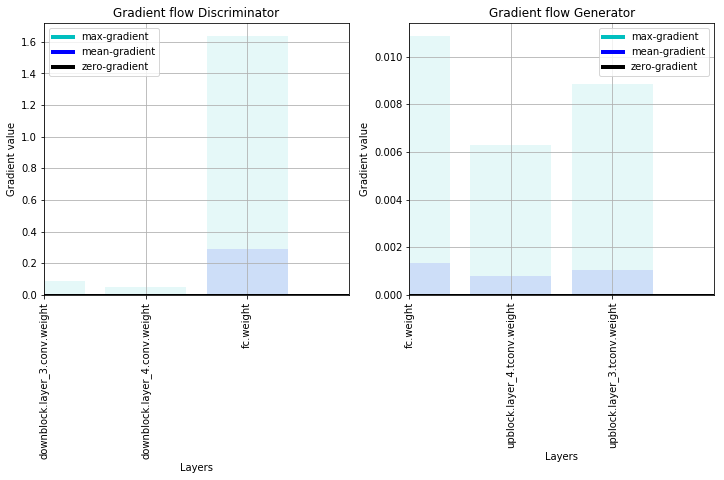

Epoch [  510/ 1600] | d_loss: 0.7264 | g_loss: 1.7281
Epoch [  520/ 1600] | d_loss: 0.4380 | g_loss: 1.4810
Epoch [  530/ 1600] | d_loss: 1.1805 | g_loss: 2.7063
Epoch [  540/ 1600] | d_loss: 0.9651 | g_loss: 2.2091
Epoch [  550/ 1600] | d_loss: 1.1658 | g_loss: 2.3544
Epoch [  560/ 1600] | d_loss: 0.9105 | g_loss: 1.7196
Epoch [  570/ 1600] | d_loss: 0.7949 | g_loss: 2.2819
Epoch [  580/ 1600] | d_loss: 0.2445 | g_loss: 1.8688
Epoch [  590/ 1600] | d_loss: 0.5360 | g_loss: 1.6280
Epoch [  600/ 1600] | d_loss: 0.4847 | g_loss: 1.7370


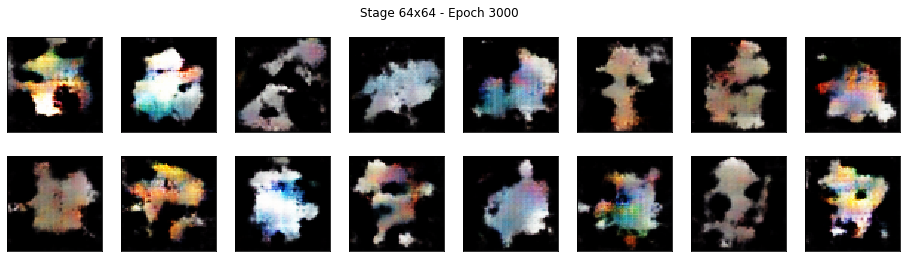

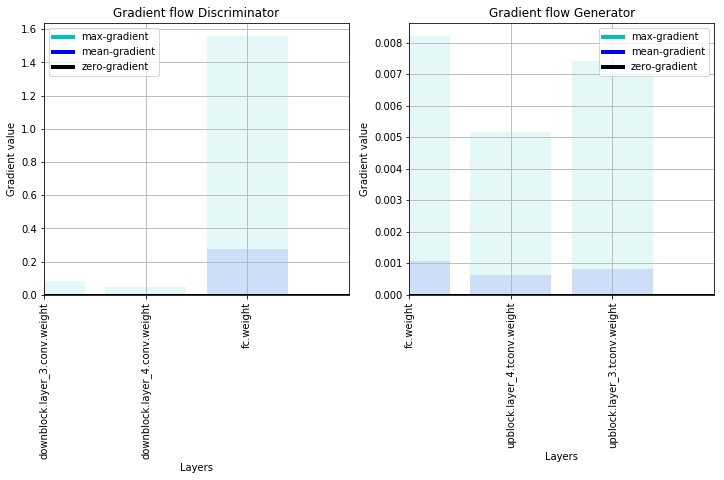

Epoch [  610/ 1600] | d_loss: 0.7393 | g_loss: 2.0582
Epoch [  620/ 1600] | d_loss: 0.6210 | g_loss: 1.6801
Epoch [  630/ 1600] | d_loss: 0.4036 | g_loss: 1.5051
Epoch [  640/ 1600] | d_loss: 0.9629 | g_loss: 2.0298
Epoch [  650/ 1600] | d_loss: 0.5201 | g_loss: 2.0670
Epoch [  660/ 1600] | d_loss: 0.8406 | g_loss: 2.2560
Epoch [  670/ 1600] | d_loss: 0.9532 | g_loss: 1.6490
Epoch [  680/ 1600] | d_loss: 0.5744 | g_loss: 2.0911
Epoch [  690/ 1600] | d_loss: 0.3381 | g_loss: 1.9087
Epoch [  700/ 1600] | d_loss: 0.9397 | g_loss: 1.7431


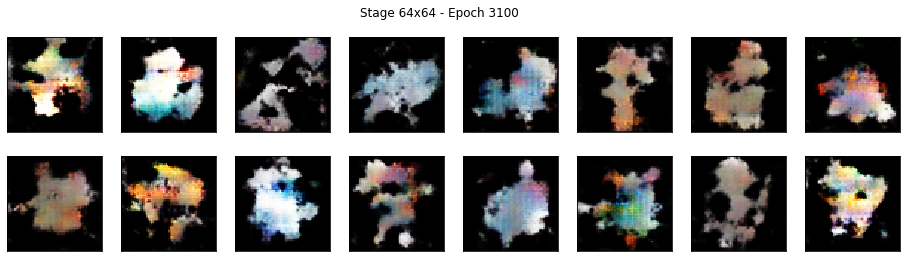

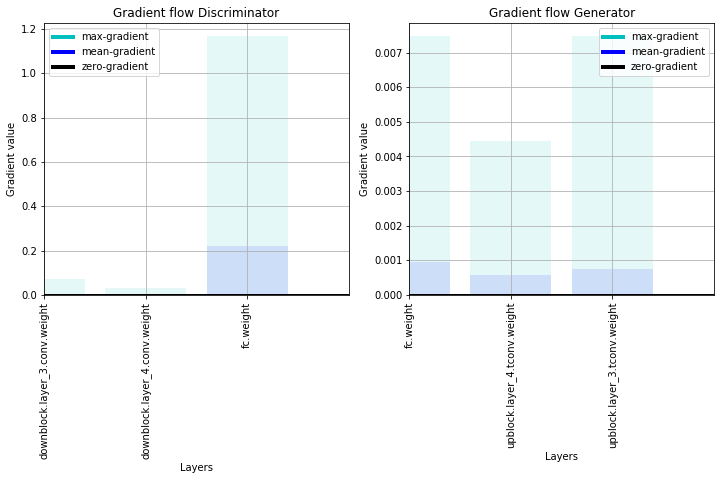

Epoch [  710/ 1600] | d_loss: 0.8841 | g_loss: 2.1468
Epoch [  720/ 1600] | d_loss: 0.7541 | g_loss: 1.6457
Epoch [  730/ 1600] | d_loss: 0.8359 | g_loss: 1.9934
Epoch [  740/ 1600] | d_loss: 0.5635 | g_loss: 1.7982
Epoch [  750/ 1600] | d_loss: 0.6239 | g_loss: 2.3810
Epoch [  760/ 1600] | d_loss: 0.4629 | g_loss: 2.0743
Epoch [  770/ 1600] | d_loss: 1.0665 | g_loss: 1.8946
Epoch [  780/ 1600] | d_loss: 0.5993 | g_loss: 1.9715
Epoch [  790/ 1600] | d_loss: 0.6166 | g_loss: 1.8537
Epoch [  800/ 1600] | d_loss: 0.7886 | g_loss: 1.6906


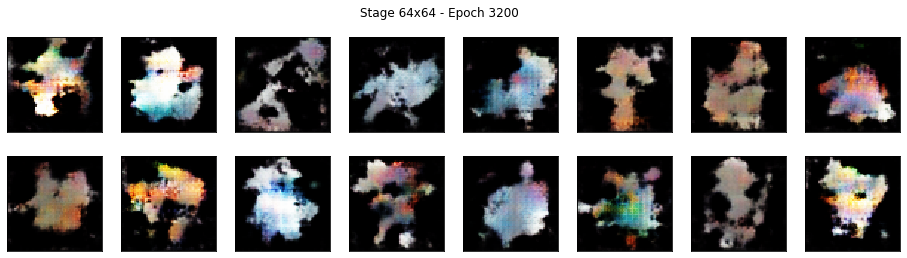

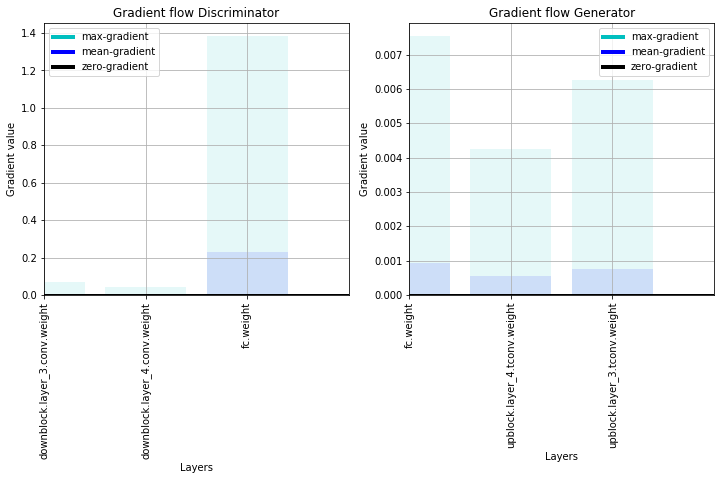

Epoch [  810/ 1600] | d_loss: 0.5782 | g_loss: 2.3278
Epoch [  820/ 1600] | d_loss: 0.5706 | g_loss: 1.9919
Epoch [  830/ 1600] | d_loss: 0.7556 | g_loss: 1.6011
Epoch [  840/ 1600] | d_loss: 0.5026 | g_loss: 1.3810
Epoch [  850/ 1600] | d_loss: 0.4775 | g_loss: 1.7935
Epoch [  860/ 1600] | d_loss: 0.7873 | g_loss: 2.2113
Epoch [  870/ 1600] | d_loss: 0.8873 | g_loss: 1.8413
Epoch [  880/ 1600] | d_loss: 1.0216 | g_loss: 1.9264
Epoch [  890/ 1600] | d_loss: 0.6648 | g_loss: 1.6160
Epoch [  900/ 1600] | d_loss: 0.8917 | g_loss: 1.4893


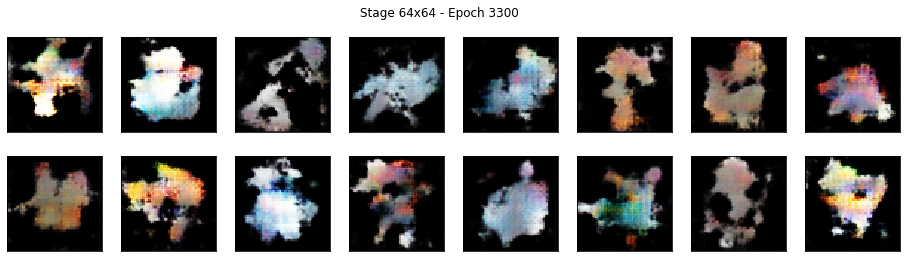

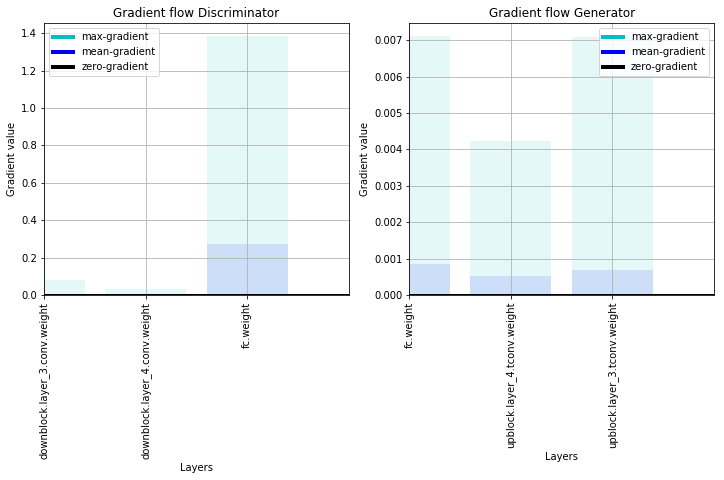

Epoch [  910/ 1600] | d_loss: 0.5600 | g_loss: 1.6667
Epoch [  920/ 1600] | d_loss: 0.7157 | g_loss: 1.7245
Epoch [  930/ 1600] | d_loss: 1.1448 | g_loss: 2.0090
Epoch [  940/ 1600] | d_loss: 0.4264 | g_loss: 1.4927
Epoch [  950/ 1600] | d_loss: 0.4560 | g_loss: 1.9428
Epoch [  960/ 1600] | d_loss: 0.2853 | g_loss: 2.1324
Epoch [  970/ 1600] | d_loss: 0.7553 | g_loss: 1.9498
Epoch [  980/ 1600] | d_loss: 0.8834 | g_loss: 1.7704
Epoch [  990/ 1600] | d_loss: 0.9087 | g_loss: 1.7166
Epoch [ 1000/ 1600] | d_loss: 0.7414 | g_loss: 1.8869


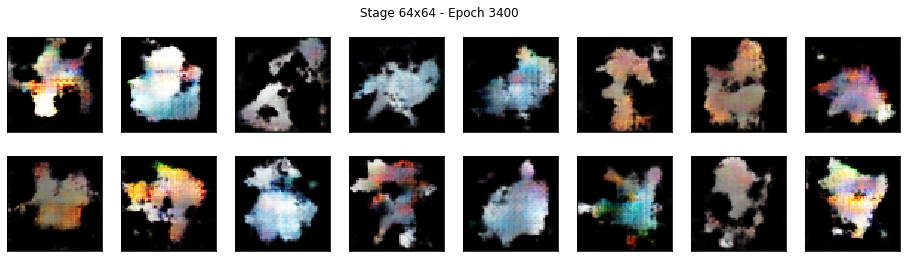

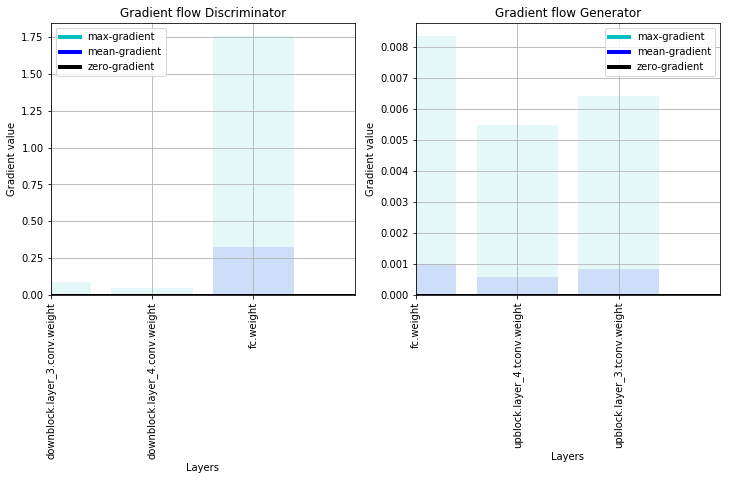

Epoch [ 1010/ 1600] | d_loss: 0.6666 | g_loss: 1.8823
Epoch [ 1020/ 1600] | d_loss: 0.4300 | g_loss: 1.8649
Epoch [ 1030/ 1600] | d_loss: 0.6980 | g_loss: 1.3129
Epoch [ 1040/ 1600] | d_loss: 1.2461 | g_loss: 2.1694
Epoch [ 1050/ 1600] | d_loss: 0.4267 | g_loss: 1.5392
Epoch [ 1060/ 1600] | d_loss: 0.6599 | g_loss: 1.7117
Epoch [ 1070/ 1600] | d_loss: 0.7082 | g_loss: 1.7123
Epoch [ 1080/ 1600] | d_loss: 0.9047 | g_loss: 1.7156
Epoch [ 1090/ 1600] | d_loss: 1.0937 | g_loss: 1.9903
Epoch [ 1100/ 1600] | d_loss: 0.5688 | g_loss: 1.6912


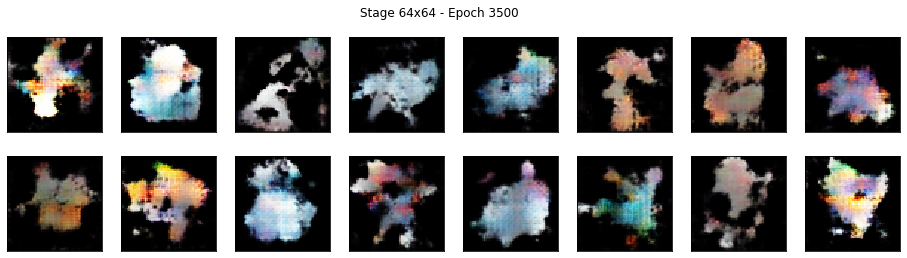

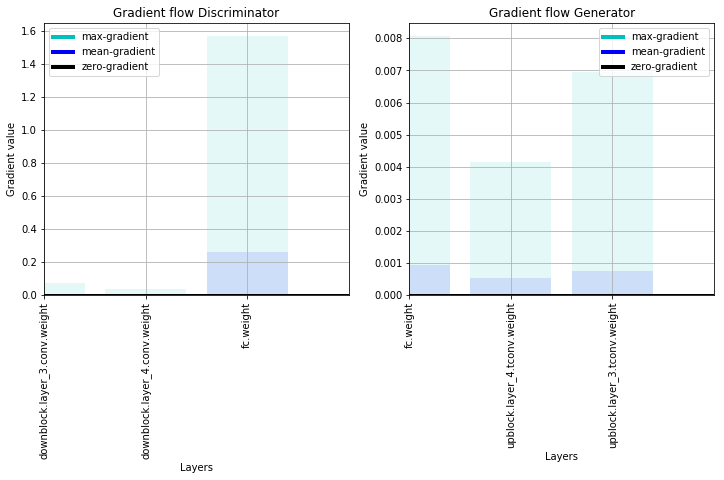

Epoch [ 1110/ 1600] | d_loss: 0.6792 | g_loss: 2.0712
Epoch [ 1120/ 1600] | d_loss: 0.8507 | g_loss: 1.8283
Epoch [ 1130/ 1600] | d_loss: 0.7669 | g_loss: 1.6561
Epoch [ 1140/ 1600] | d_loss: 0.6452 | g_loss: 1.8840
Epoch [ 1150/ 1600] | d_loss: 1.0886 | g_loss: 2.1967
Epoch [ 1160/ 1600] | d_loss: 0.7548 | g_loss: 1.6088
Epoch [ 1170/ 1600] | d_loss: 0.5663 | g_loss: 1.4544
Epoch [ 1180/ 1600] | d_loss: 0.6958 | g_loss: 2.0775
Epoch [ 1190/ 1600] | d_loss: 0.6727 | g_loss: 1.4320
Epoch [ 1200/ 1600] | d_loss: 0.9154 | g_loss: 1.2477


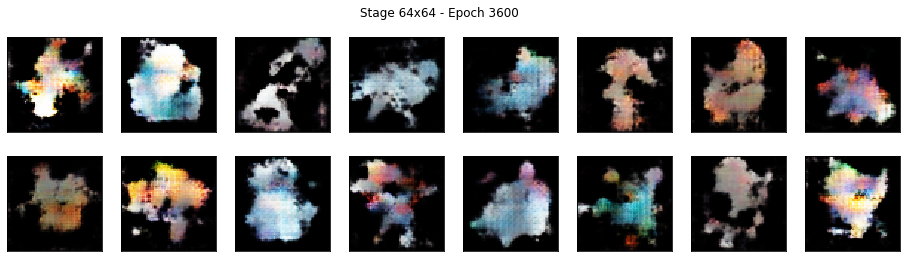

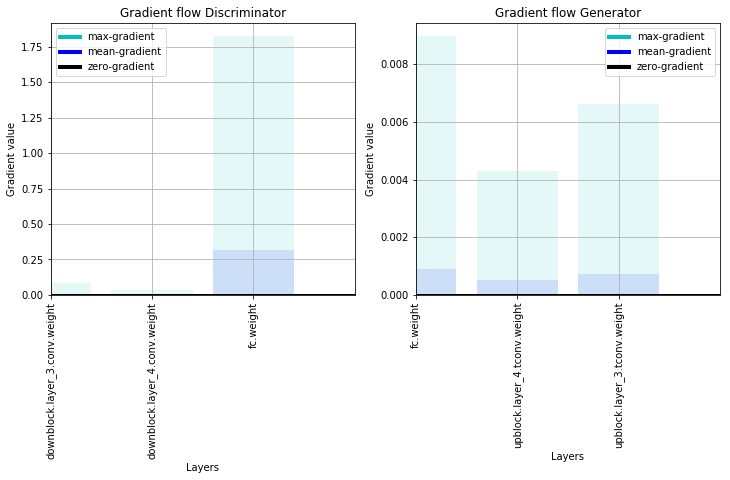

Epoch [ 1210/ 1600] | d_loss: 0.6980 | g_loss: 2.0087
Epoch [ 1220/ 1600] | d_loss: 0.8067 | g_loss: 1.7209
Epoch [ 1230/ 1600] | d_loss: 0.5685 | g_loss: 2.0113
Epoch [ 1240/ 1600] | d_loss: 0.7359 | g_loss: 2.1503
Epoch [ 1250/ 1600] | d_loss: 0.7691 | g_loss: 1.9602
Epoch [ 1260/ 1600] | d_loss: 0.8278 | g_loss: 1.9317
Epoch [ 1270/ 1600] | d_loss: 0.9265 | g_loss: 1.6297
Epoch [ 1280/ 1600] | d_loss: 0.6955 | g_loss: 1.4785
Epoch [ 1290/ 1600] | d_loss: 0.6011 | g_loss: 1.4052
Epoch [ 1300/ 1600] | d_loss: 0.4087 | g_loss: 1.6079


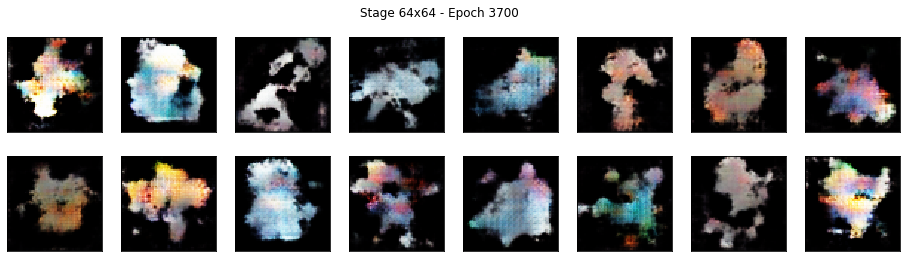

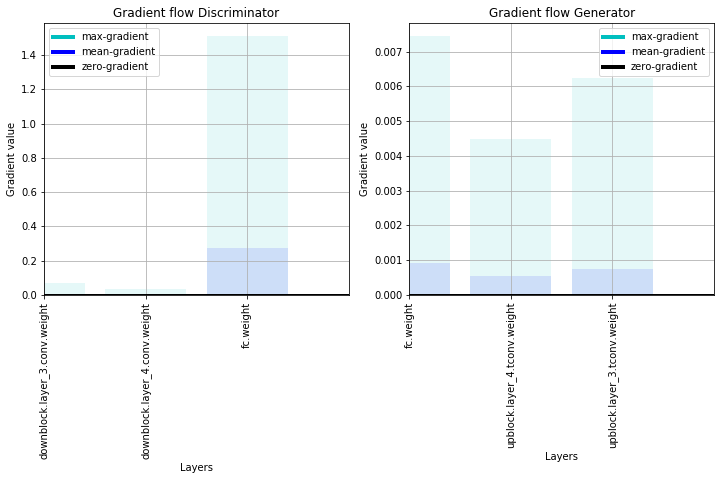

Epoch [ 1310/ 1600] | d_loss: 0.6986 | g_loss: 1.5278
Epoch [ 1320/ 1600] | d_loss: 0.4679 | g_loss: 1.9283
Epoch [ 1330/ 1600] | d_loss: 0.6292 | g_loss: 1.8057
Epoch [ 1340/ 1600] | d_loss: 0.9811 | g_loss: 1.2538
Epoch [ 1350/ 1600] | d_loss: 0.9288 | g_loss: 1.8091
Epoch [ 1360/ 1600] | d_loss: 0.5464 | g_loss: 1.5290
Epoch [ 1370/ 1600] | d_loss: 0.5312 | g_loss: 1.8417
Epoch [ 1380/ 1600] | d_loss: 0.9542 | g_loss: 1.8866
Epoch [ 1390/ 1600] | d_loss: 0.6288 | g_loss: 1.8592
Epoch [ 1400/ 1600] | d_loss: 1.0308 | g_loss: 1.8351


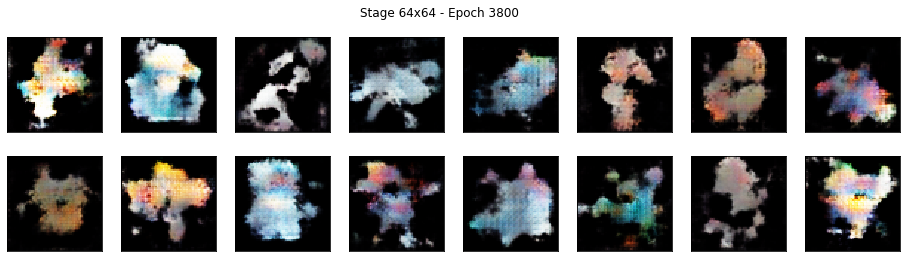

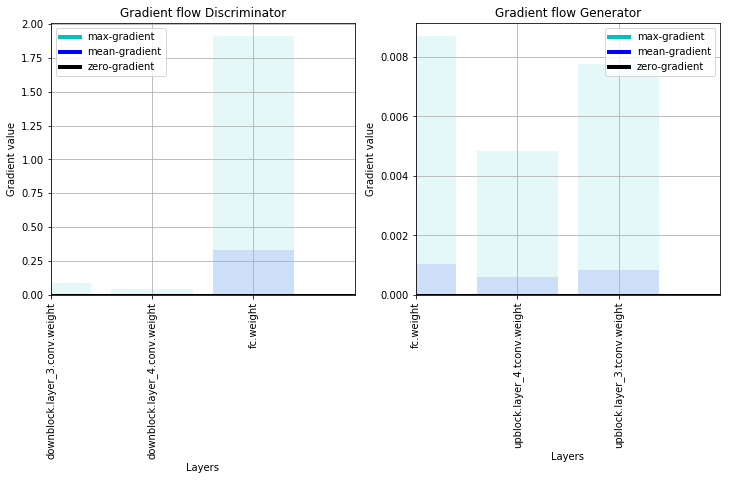

Epoch [ 1410/ 1600] | d_loss: 1.2988 | g_loss: 1.5701
Epoch [ 1420/ 1600] | d_loss: 0.5963 | g_loss: 1.7299
Epoch [ 1430/ 1600] | d_loss: 0.3744 | g_loss: 1.8279
Epoch [ 1440/ 1600] | d_loss: 0.8817 | g_loss: 1.6839
Epoch [ 1450/ 1600] | d_loss: 0.9802 | g_loss: 1.6268
Epoch [ 1460/ 1600] | d_loss: 0.3571 | g_loss: 1.4241
Epoch [ 1470/ 1600] | d_loss: 0.8832 | g_loss: 1.6079
Epoch [ 1480/ 1600] | d_loss: 0.5128 | g_loss: 1.8076
Epoch [ 1490/ 1600] | d_loss: 0.9728 | g_loss: 1.5573
Epoch [ 1500/ 1600] | d_loss: 1.2445 | g_loss: 1.4395


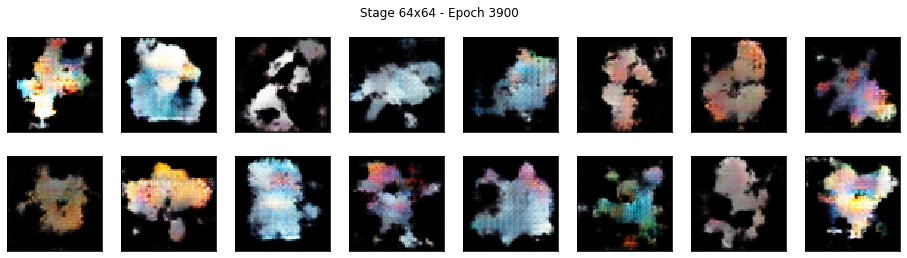

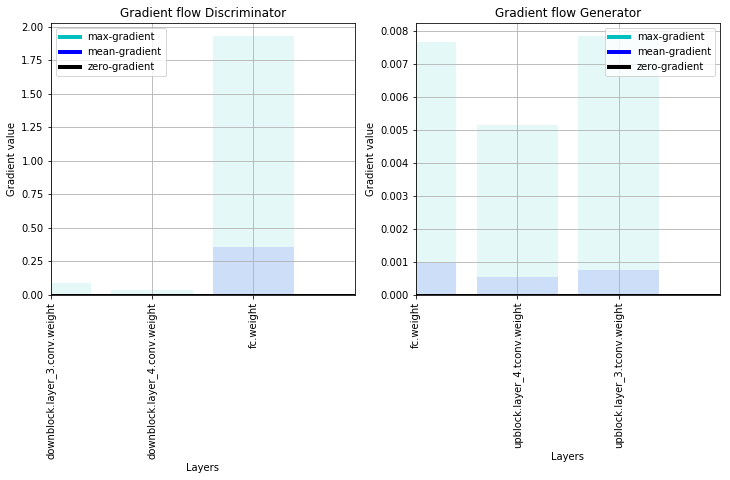

Epoch [ 1510/ 1600] | d_loss: 0.5492 | g_loss: 1.3748
Epoch [ 1520/ 1600] | d_loss: 1.0627 | g_loss: 1.7318
Epoch [ 1530/ 1600] | d_loss: 0.4265 | g_loss: 1.7230
Epoch [ 1540/ 1600] | d_loss: 0.7867 | g_loss: 1.7857
Epoch [ 1550/ 1600] | d_loss: 0.8144 | g_loss: 1.7473
Epoch [ 1560/ 1600] | d_loss: 0.8374 | g_loss: 1.9112
Epoch [ 1570/ 1600] | d_loss: 0.8242 | g_loss: 2.2795
Epoch [ 1580/ 1600] | d_loss: 0.7495 | g_loss: 2.0443
Epoch [ 1590/ 1600] | d_loss: 0.4842 | g_loss: 1.8458
Epoch [ 1600/ 1600] | d_loss: 1.0020 | g_loss: 1.9403


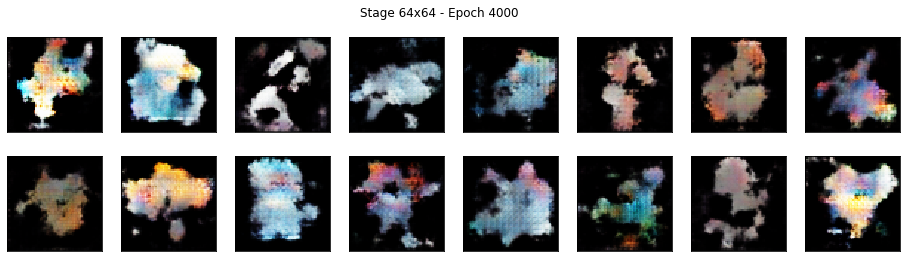

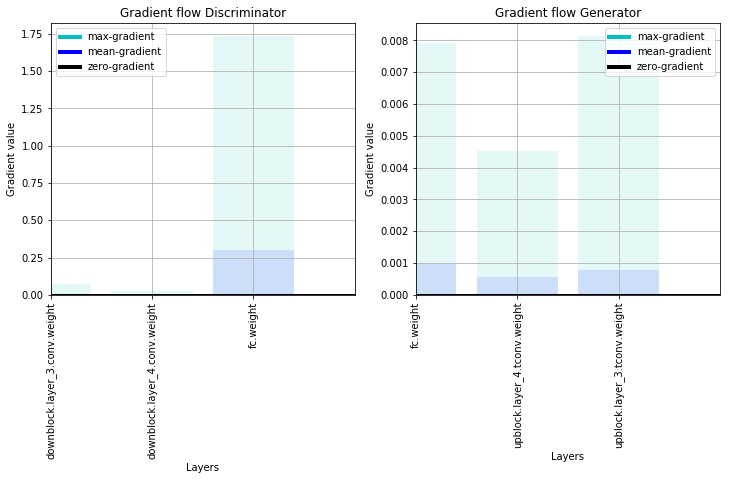

In [14]:
tot_epochs = 0
for stage_idx in range(nb_stages):
    poke_loader = get_dataloader(batch_size, img_size, data_dir='data')

    # Check number of sampling operations
    d_depth = int(np.log2(img_size / latent_feature_size))
    g_depth = d_depth + int(np.log2(d_conv_dim / g_conv_dim))
    # Recreate the nets
    d_channels = [3] + [2 ** idx * d_conv_dim for idx in range(d_depth)]
    D = Discriminator(d_channels, img_size, d_ksize, d_stride,
                      normalization_block=norm_block, use_dropout=use_dropout,
                      init_weights=normal_initialization)

    g_channels = [2 ** (g_depth - 1 - idx) * g_conv_dim for idx in range(g_depth)] + [3]
    G = Generator(z_size, g_channels, img_size, g_ksize, g_stride,
                  normalization_block=norm_block, use_dropout=use_dropout,
                  init_weights=normal_initialization)
    # Parameter loading & freezing
    if stage_idx > 0:
        # Load stage parameters & freeze previously trained layers
        D.load_state_dict(d_state_dict, strict=False)
        D.freeze_layers(d_depth - 1)
        
        G.load_state_dict(g_state_dict, strict=False)
        G.freeze_layers(g_depth - 1)

    # Move models to GPU
    if train_on_gpu:
        D.cuda()
        G.cuda()
                
    # Train the stage
    print(f"======================\nStage {img_size}x{img_size} ({stage_idx+1}/{nb_stages})\n======================")
    for cycle_idx, cycle_settings in enumerate(cycles[stage_idx]):
        print(f"Cycle ({cycle_idx+1}/{len(cycles[stage_idx])}) - {cycle_settings}")
        d_optimizer = optim.Adam(D.parameters(), cycle_settings.get('lr'), [beta1, beta2])
        g_optimizer = optim.Adam(G.parameters(), cycle_settings.get('lr'), [beta1, beta2])
        train_GAN(D, d_optimizer, G, g_optimizer, poke_loader, fixed_z,
                  criterion, cycle_settings.get('nb_epochs'), train_on_gpu,
                  logger, log_name=log_name, log_every=10,
                  sample_print_freq=100, starting_epoch=tot_epochs)
        tot_epochs += cycle_settings.get('nb_epochs')
        # Model state saving (keep only sampling layers)
        d_state_dict = {p_name: p for p_name, p in D.state_dict().items()
                        if p_name.split('.')[0].split('_')[0] == 'downblock'}
        g_state_dict = {p_name: p for p_name, p in G.state_dict().items()
                        if p_name.split('.')[0].split('_')[0] == 'upblock'}   


    img_size *= 2

logger.close()

In [15]:
logger.close()